# Stochastic Growth and Long-Run Risk

## Overview

__This notebook displays three models and solutions with capital and endogenously determined long-run risk.  The models are considered in each of the three sections of this notebook and include:__

__1. Adjustment cost__

__2. Permanent income__

__3. Habit persistance__

__The first is an AK model with adjustment costs inspired in part by Eberly and Wong but includes a persistence process for technology.  The second is a version of Friedman's permanent income model, and the third one extends this to include habit persistence preferences motivated by the work of Hansen, Sargent Tallarini.__

## Section 1: Adjustment Cost

We consider a so-called $AK$ model with adjustment costs and state dependent growth. 

### Section 1.1: Model Specification

 - Discrete-time utility recursion:
\begin{align*}
V_t & = \left( \left[1 - \exp(-\delta)\right] (C_t)^{1-\rho} + \exp(-\delta) \left[ {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) \right]^{1-\rho} \right)^{\frac 1 {1-\rho}} \cr
 {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right) & = \left(E\left[ \left( V_{t+1} \right)^{1 - \gamma} \mid {\frak F}_t \right] \right)^{\frac 1 {1-\gamma}}
\end{align*}


where ${\frac 1 \rho}$ is the intertemporal elasticity of substitution, $\gamma$ is a risk aversion parameter and $\delta$ is the subjective rate of discount.  Moreover, $C_t$ is consumption, $V_t$ is the continuation value, and ${\mathfrak F}_t$ is the current period consumer/investor information.  



 - Marginal utility processes:  
\begin{align*}
MC_t & = [(1 - \exp(-\delta) ] (C_t)^{-\rho} (V_t)^\rho  \cr
MR_t & = \exp(-\delta) (R_t)^{-\rho} (V_t)^{\rho}  
\end{align*}
where $R_t \equiv {\mathcal R}\left( V_{t+1} \mid {\frak F}_t \right)$.  





 - Discrete-time state evolution:
\begin{align*}
K_{t+1}  &= K_t\left[1 + \Phi \left({\frac {I_t} {K_t}}\right) \right] G_{t+1} \cr
G_{t+1} & \equiv \exp \left( - \alpha_k + Z_{t+1} - {\frac 1 2} \mid \sigma_k \mid^2  + \sigma_k\cdot W_{t+1} \right) \cr
C_t + I_t & = {\mathbb A} K_t \cr
 Z_{t+1} &= \exp(-\zeta) Z_t + \sigma_z \cdot W_{t+1}
 \end{align*}
 
 
where $W_{t+1}$ is distributed as a bivariate standard normal.  


- Adjustment cost parameterization
\begin{equation*}
\Phi(i) = i - {\frac \phi 2} i^2
\end{equation*}


Consolidating the first-order conditions for investment and consumption gives:

\begin{equation*}
\Phi^{\prime}\left({\frac {I_t}{K_t}}\right) = [\exp(\delta) - 1 ] \left[1 + \Phi\left( {\frac {I_t}{K_t}}\right)\right] \left({\frac {C_t}{K_t}}\right)^{-\rho} \left({\frac {R_t}{K_t}}\right)^{\rho  - 1} 
\end{equation*}


which can be solved for either ${\frac {C_t} {K_t}}$ or ${\frac {I_t}{K_t}}$ after substituting from the equation 
${\mathbb A} = {\frac {C_t}{K_t}} + {\frac {I_t}{K_t}}$.  

We solve the model using first-order small noise approximation.  We check the solution against a more general nonlinear method and verify the quality of the approximation.  

### Section 1.2: First Calibration, Low Return

Our calculations use the following parameter values:
\begin{align*}  
& \begin{matrix}
{\alpha}_c  & = & .373  & & & & \cr
{ \alpha}_z  &= & 0 &  & { \zeta} & = & .017 \end{matrix} \cr \cr
& \sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .481  & 0 \cr  .012 & .027 \end{bmatrix}
\end{align*}


The quantities computed with these numbers will be in percentage terms (100 times log differences).  

Use the order zero relations to pin down some key parameters:
\begin{align*} 
{\frac C I} & = {\frac {\exp\left( c^0 \right)}{ {\mathbb A} - \exp\left( c^0 \right)}} = 1
\label{calibration1}  \\
{\frac I K} & = {\mathbb A} - \exp\left( c^0 \right) = .0275 \ \\
\exp( g^0) & = \left[ 1 + \Phi[ {\mathbb A} - \exp \left( c^0 \right) \right] \exp(  - .01 \alpha_k )  =  \exp(.01 \alpha_c)  = \exp(.00373)  \\
 \delta + .00373 \rho & = .0075 
\end{align*}


The first two equations determine $c^0$ and ${\mathbb A}$.  The third equation, along with the steady relations for optimal consumption and the continuation value relative to consumption 
determine $\alpha_k, \phi$.  Finally, the fourth equation  determines $\delta.$ All of these are solved for a pre-specified value of $\rho$.    The implied value of ${\mathbb A} = .053$, and the implied value of $\alpha_k = 1.13$.   The implied annualized return is three percent.  We consider $\rho = .5, 1, 2$.

The above calibrations are derived from empirical targets, with data from the Federal Reserve Bank of Saint Louis (FRED) and the Bureau of Economic Analysis (BEA). The consumption-to-investment ratio comes from aggregate personal consumption expeditures to gross private domestic investment, averaged from quarterly FRED data from Q1 1963 through Q2 2018. The growth rate target comes from the measured growth rate of non-durable goods and services consumption expenditure per capita, with quarterly measurements from FRED being averaged from Q1 1963 through Q2 2018. The target for investment-to-capital ratio comes from gross private nonresidential fixed investment to private nonresidential fixed assets, reported by the Bureau of Economic Analysis. These annual numbers from 1963 to 2014 were averaged and then converted to quarterly observations.

In [1]:
# Import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from model_code import solve_model
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def plot_impulse(rhos, gamma, delta, phi, A, a_k, zeta, T, empirical_method = 1,
                 shock = 1, rf_factor = 1, transform_shocks = False, 
                 title = None):
    """
    Given a set of parameters, computes and displays the impulse responses of
    consumption, capital, the consumption-investment ratio, along with the
    shock price elacticities.
    
    Input
    ==========
    Note that the values of delta, phi, A, and a_k are only used for the
    empirical_method = 0 specification (see below). 
    
    rhos:               The set of rho values for which to plot the IRFs.
    gamma:              The risk aversion of the model.
    delta:              Subjective rate of discount.
    phi:                Adjustment cost parameter.
    A:                  AK technology parameter.
    a_k:                Depreciation.
    zeta:               Shock persistence.
    T:                  Number of periods to plot (in quarters).
    empirical_method:   Defines which empirical moments are selected for solving
                        the model. The options are:
                            0 - Does not use empirical data, but uses the values
                                 for delta, phi, A, and a_k that the function
                                 takes in.
                            1 - Uses empirical targets for growth rate, 
                                consumption to investment ratio and investment 
                                to capital ratio to set the parameters.
                            2 - The same as (1) except C/I is free and phi is 
                                set to 0.
                            3 - The same as (1) except I/K is free and phi is 
                                set to 0.
    shock:              (1 or 2) Defines which of the two possible shocks to plot.
    rf_factor:          This number is used as follows: delta + 0.00373 * rho = 
                        rf_factor * 0.0075
    transform_shocks:   True or False. True to make the rho = 1 response to 
                        shock 2 be transitory.
    title:              Title for the image plotted.
    """
    
    fig = plt.figure(figsize=(20, 30))
    
    smin = 0
    smax = 0
    kmin = 0
    kmax = 0
    cmin = 0
    cmax = 0
    dmin = 0
    dmax = 0
    
    for i, r in enumerate(rhos):

        S, K, C, I = solve_model(r, gamma, delta, phi, A, a_k, zeta, T,
                                 risk_free_adj = rf_factor,
                                 empirical = empirical_method,
                                 transform = transform_shocks, shock = shock)[2]

        plt.subplot(4, 1, 1)
        plt.plot(S, label=r"$\rho={}$".format(r), lw=3)
        smin = min(smin, np.min(S) * 1.2)
        smax = max(smax, np.max(S) * 1.2)
        if i == len(rhos) - 1:
            plt.ylabel("Price Elasticity", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([smin, smax])

        plt.subplot(4, 1, 2)
        plt.plot(100*K, label=r"$\rho={}$".format(r), lw=3)
        kmin = min(kmin, np.min(K) * 120)
        kmax = max(kmax, np.max(K) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Capital", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([kmin, kmax])

        plt.subplot(4, 1, 3)
        plt.plot(100 * C, label=r"$\rho={}$".format(r), lw=3)
        cmin = min(cmin, np.min(C) * 120)
        cmax = max(cmax, np.max(C) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([cmin, cmax])

        plt.subplot(4, 1, 4)
        plt.plot(100 * (C - I), label=r"$\rho={}$".format(r), lw=3)
        dmin = min(dmin, np.min(C - I) * 120)
        dmax = max(dmax, np.max(C - I) * 120)
        if i == len(rhos) - 1:
            plt.ylabel("Consumption-Investment Ratio", fontsize = 25)
            plt.legend(loc='lower right', prop={'size': 20})
            plt.ylim([dmin, dmax])
            plt.xlabel("Time (quarters)", fontsize = 25)

    plt.suptitle(title, fontsize = 30)
    plt.tight_layout(rect=[0, 0, 1, 0.97]) # Allow for padding on the suptitle

    plt.show()

In [3]:
# Define some reasonable parameter sets.
ρs = [.5, 1, 2]
γ = 10
δ = 0.02
ϕ = 13.807
A = 0.0572
α = 0.017
ζ = 0.017
T = 200

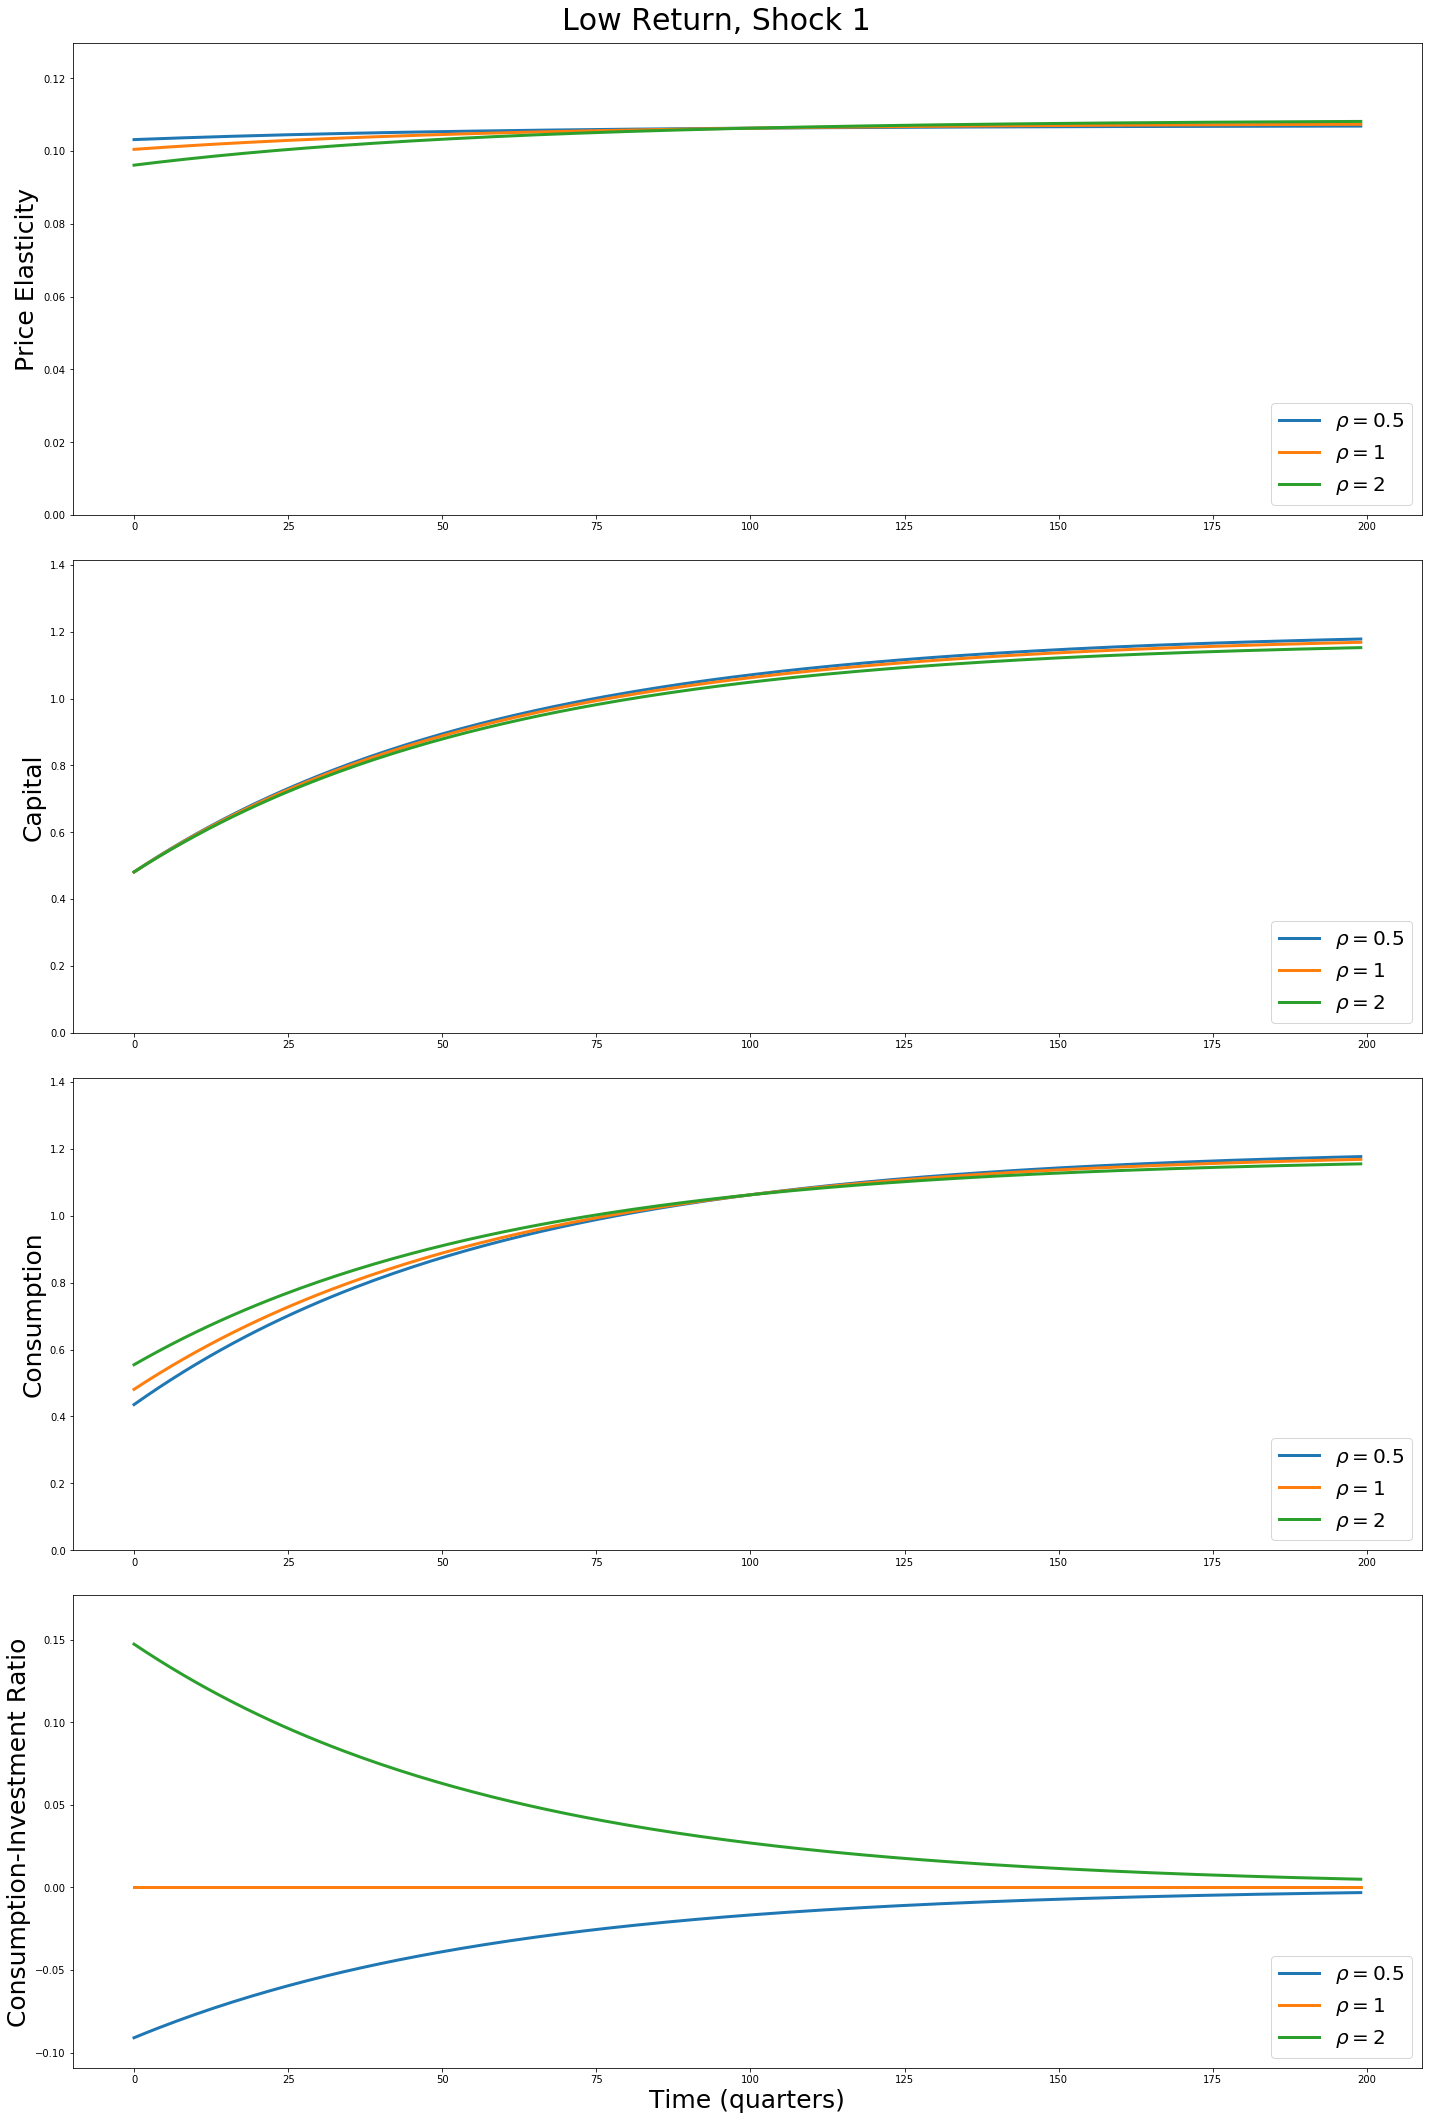

In [4]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 1, rf_factor = 1, 
             transform_shocks = False, title = "Low Return, Shock 1")

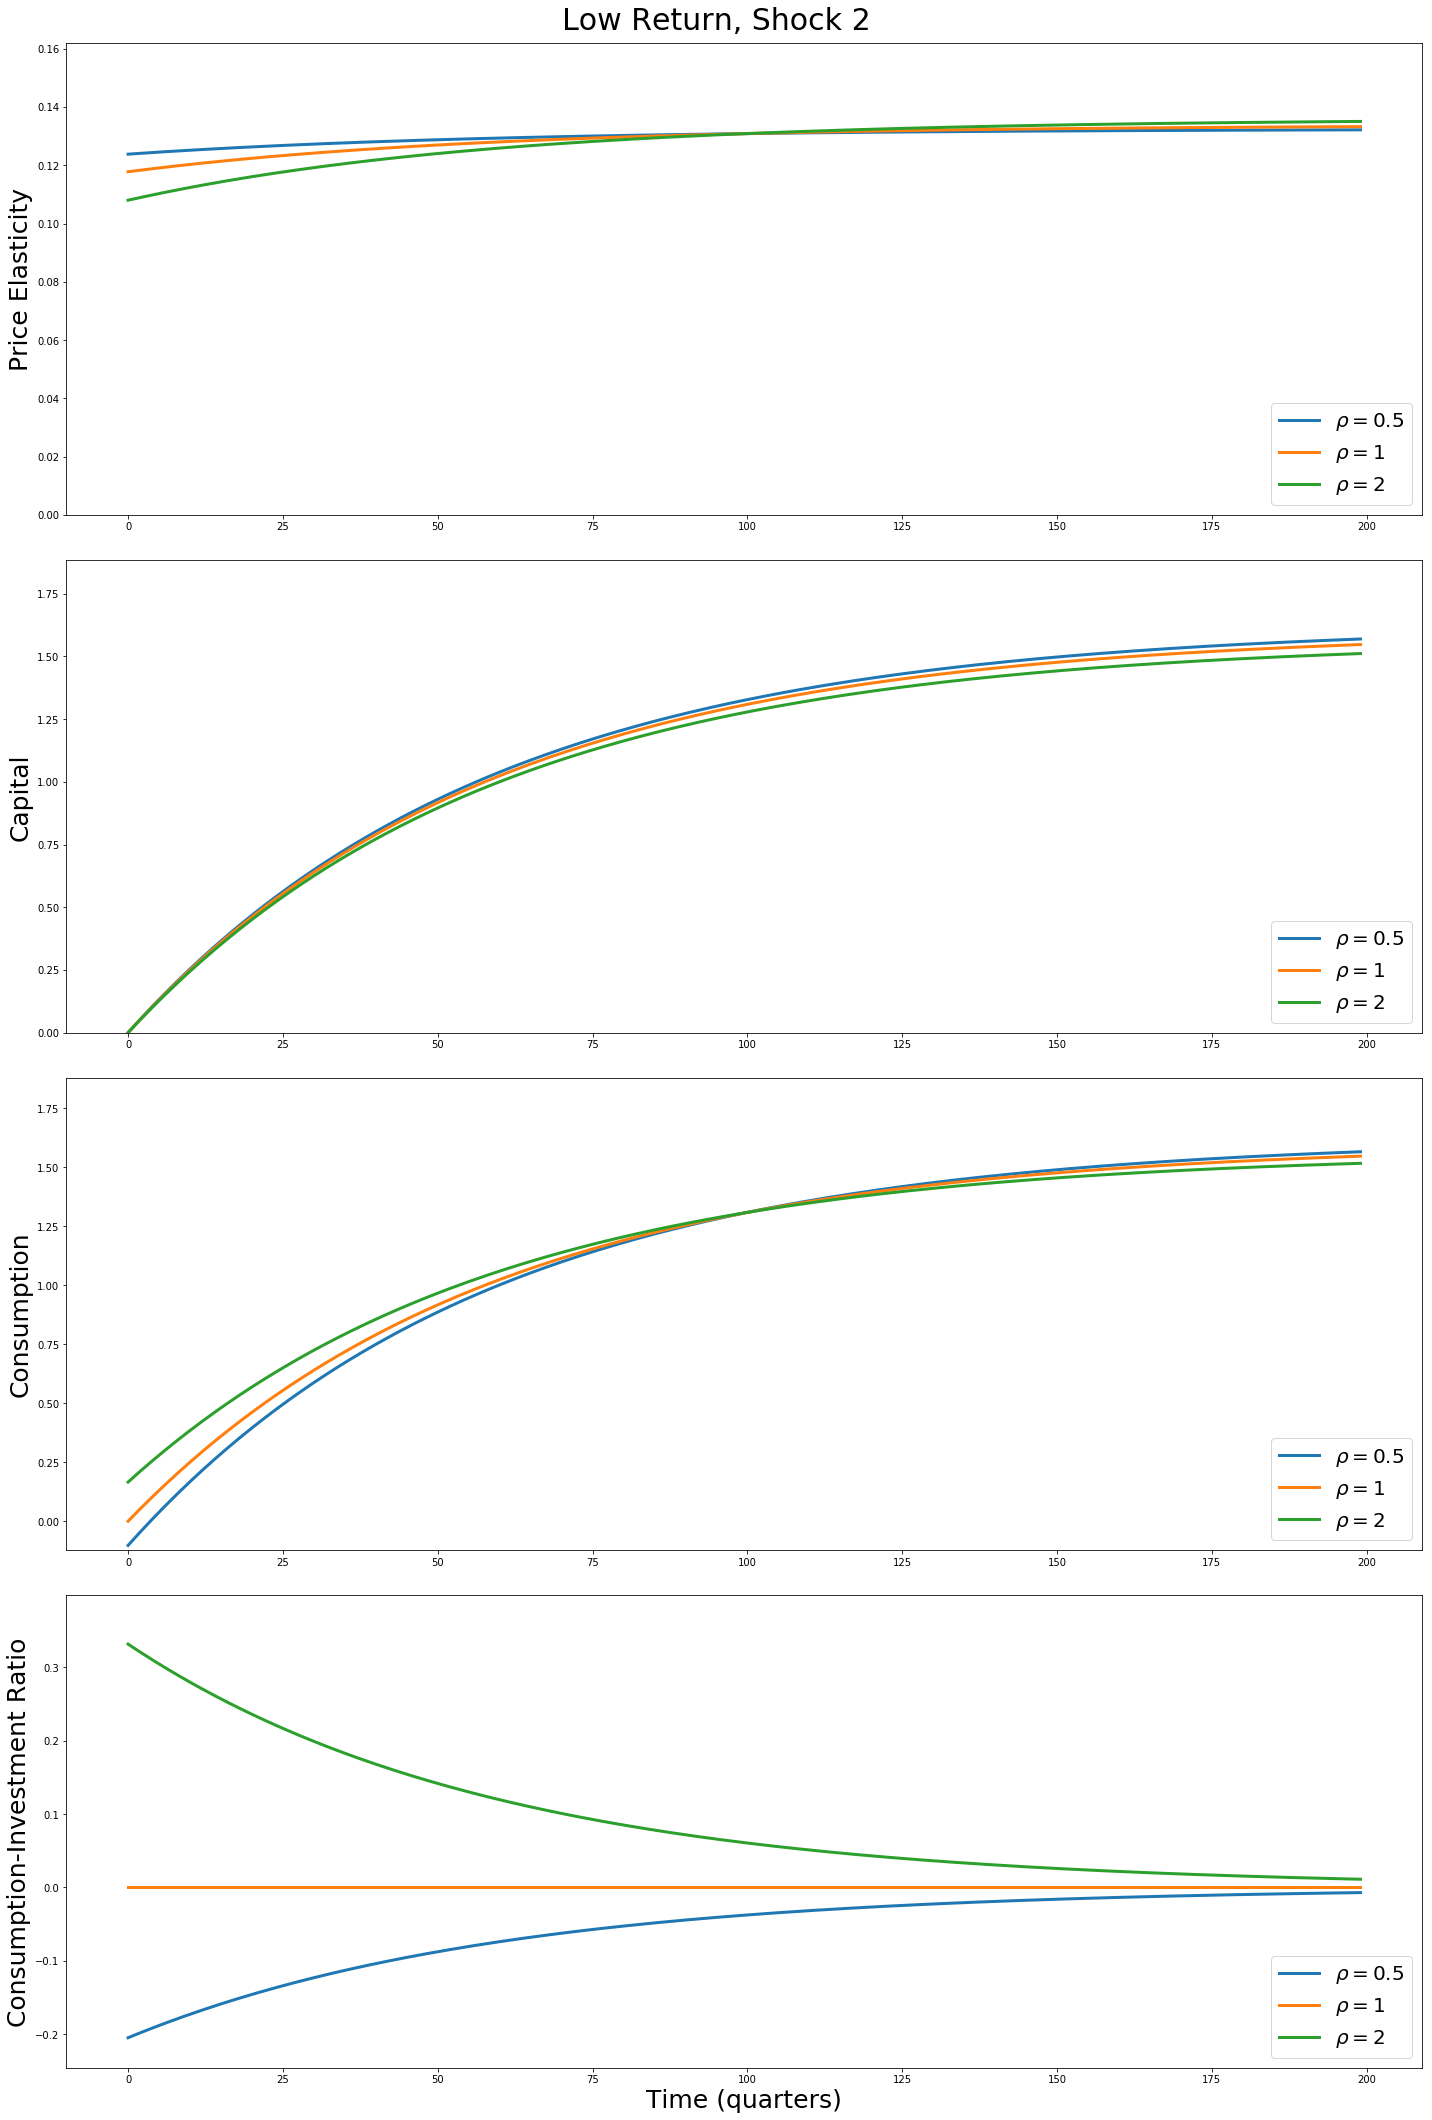

In [5]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 2, rf_factor = 1, 
             transform_shocks = False, title = "Low Return, Shock 2")

### Section 1.3: Second Calibration, High Return

We now consider a specification with a higher return whereby
\begin{equation*}
\delta + .00373 \rho  = .015
\end{equation*}
implying a six percent annualized return.  For this calibration ${\mathbb A} = .053$, $\alpha_k = 1.51$ and $\phi=21.3.$

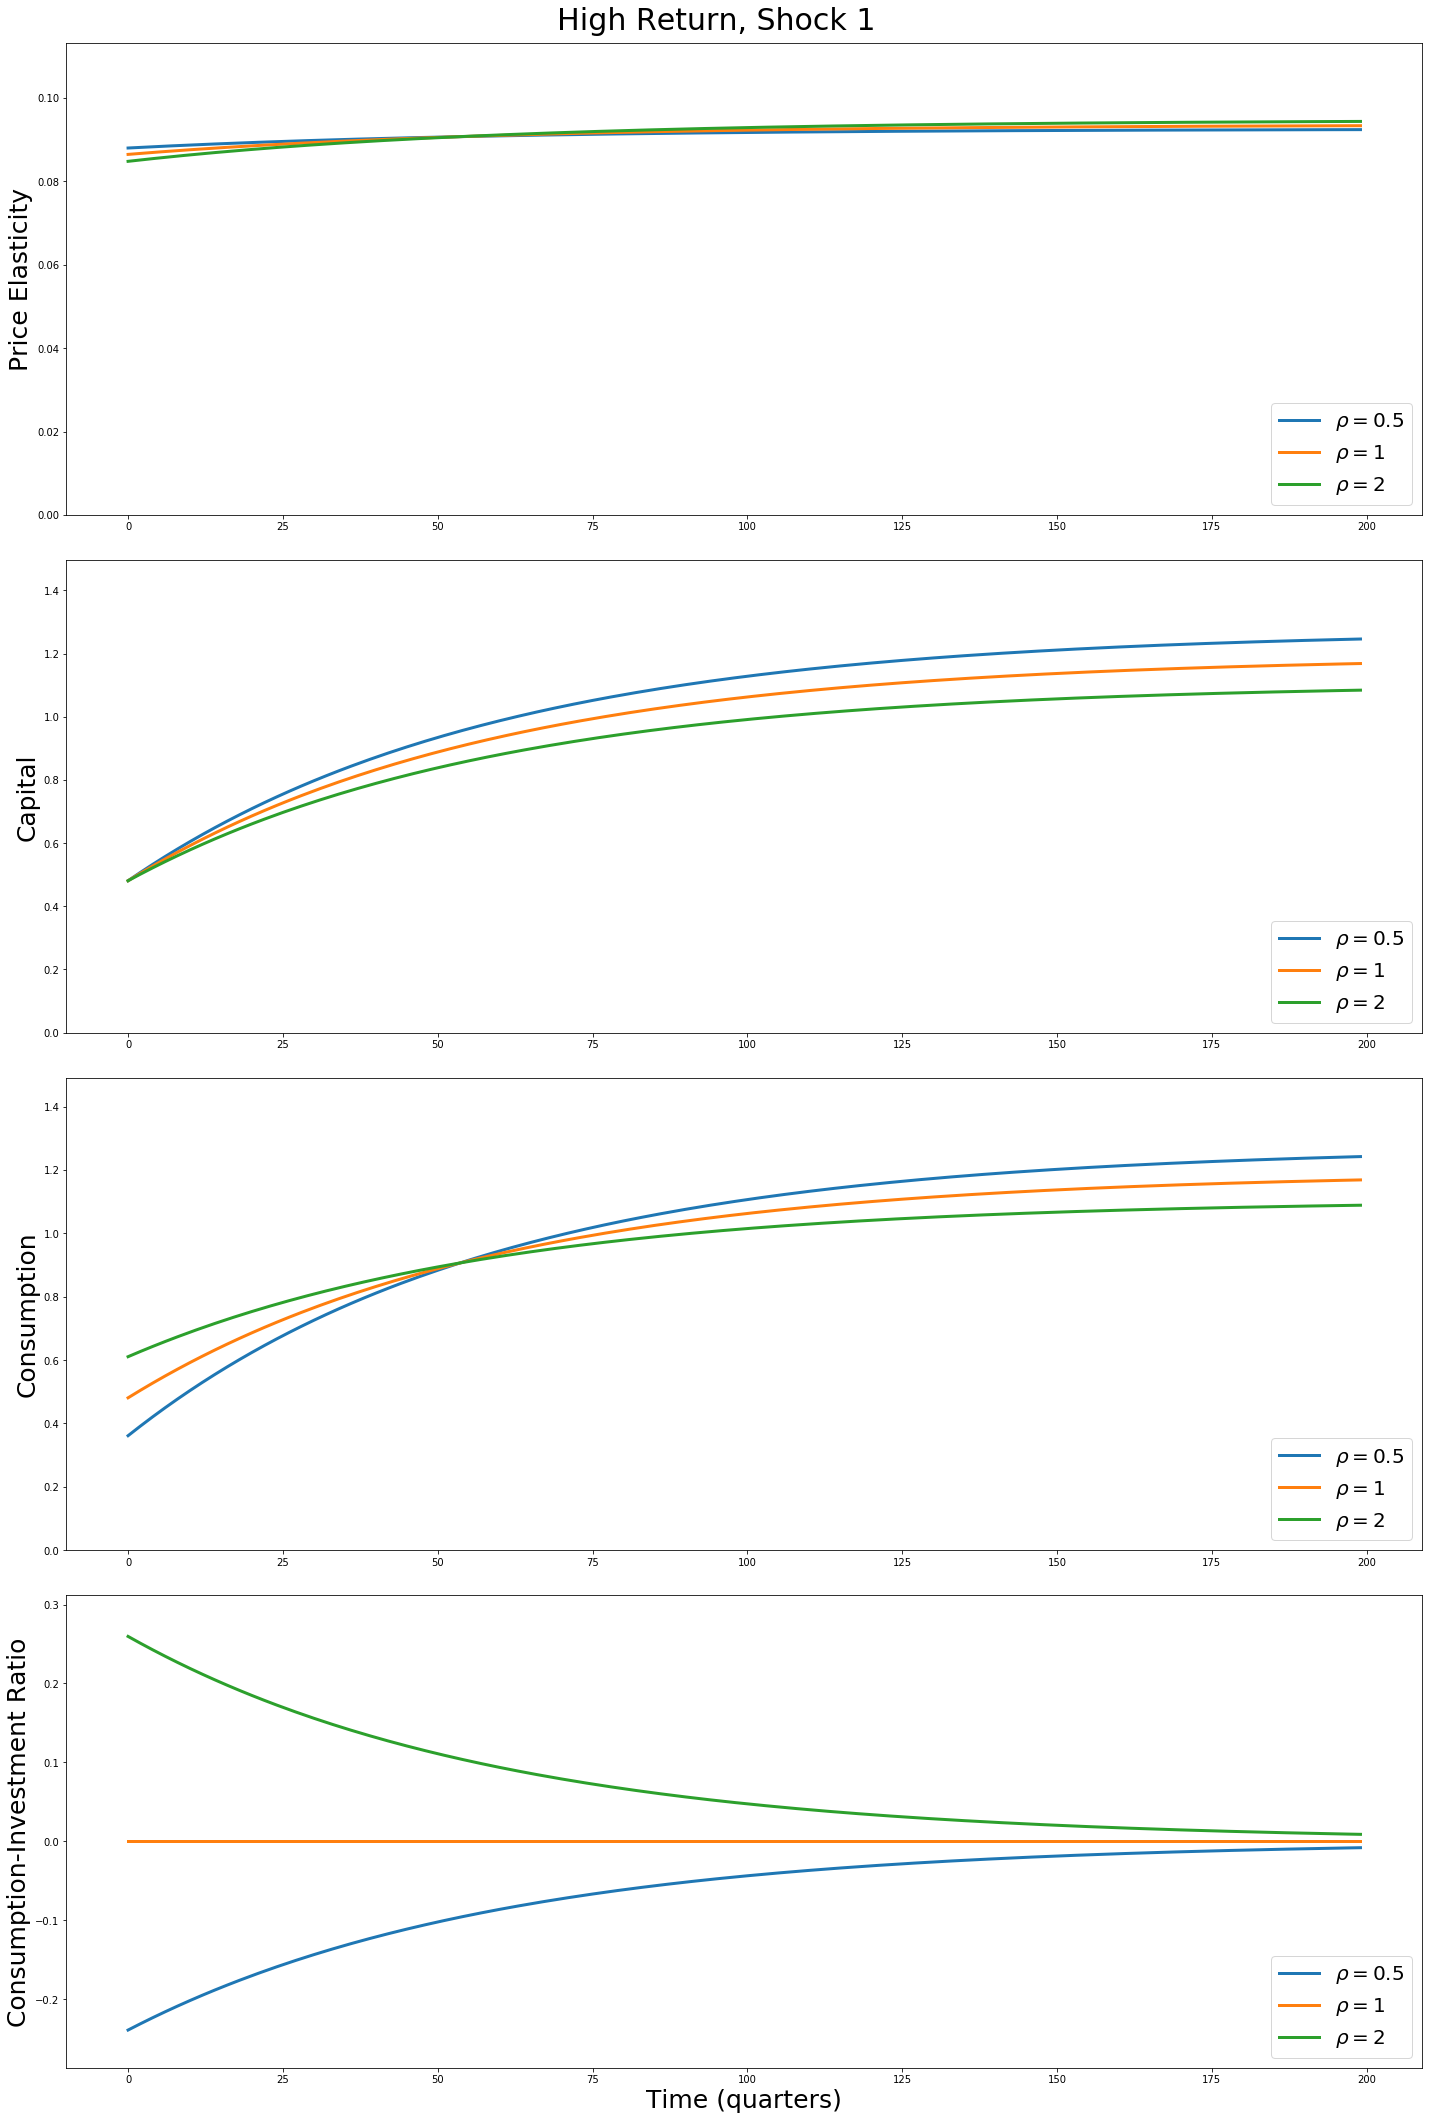

In [6]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 1, rf_factor = 2, 
             transform_shocks = False, title = "High Return, Shock 1")

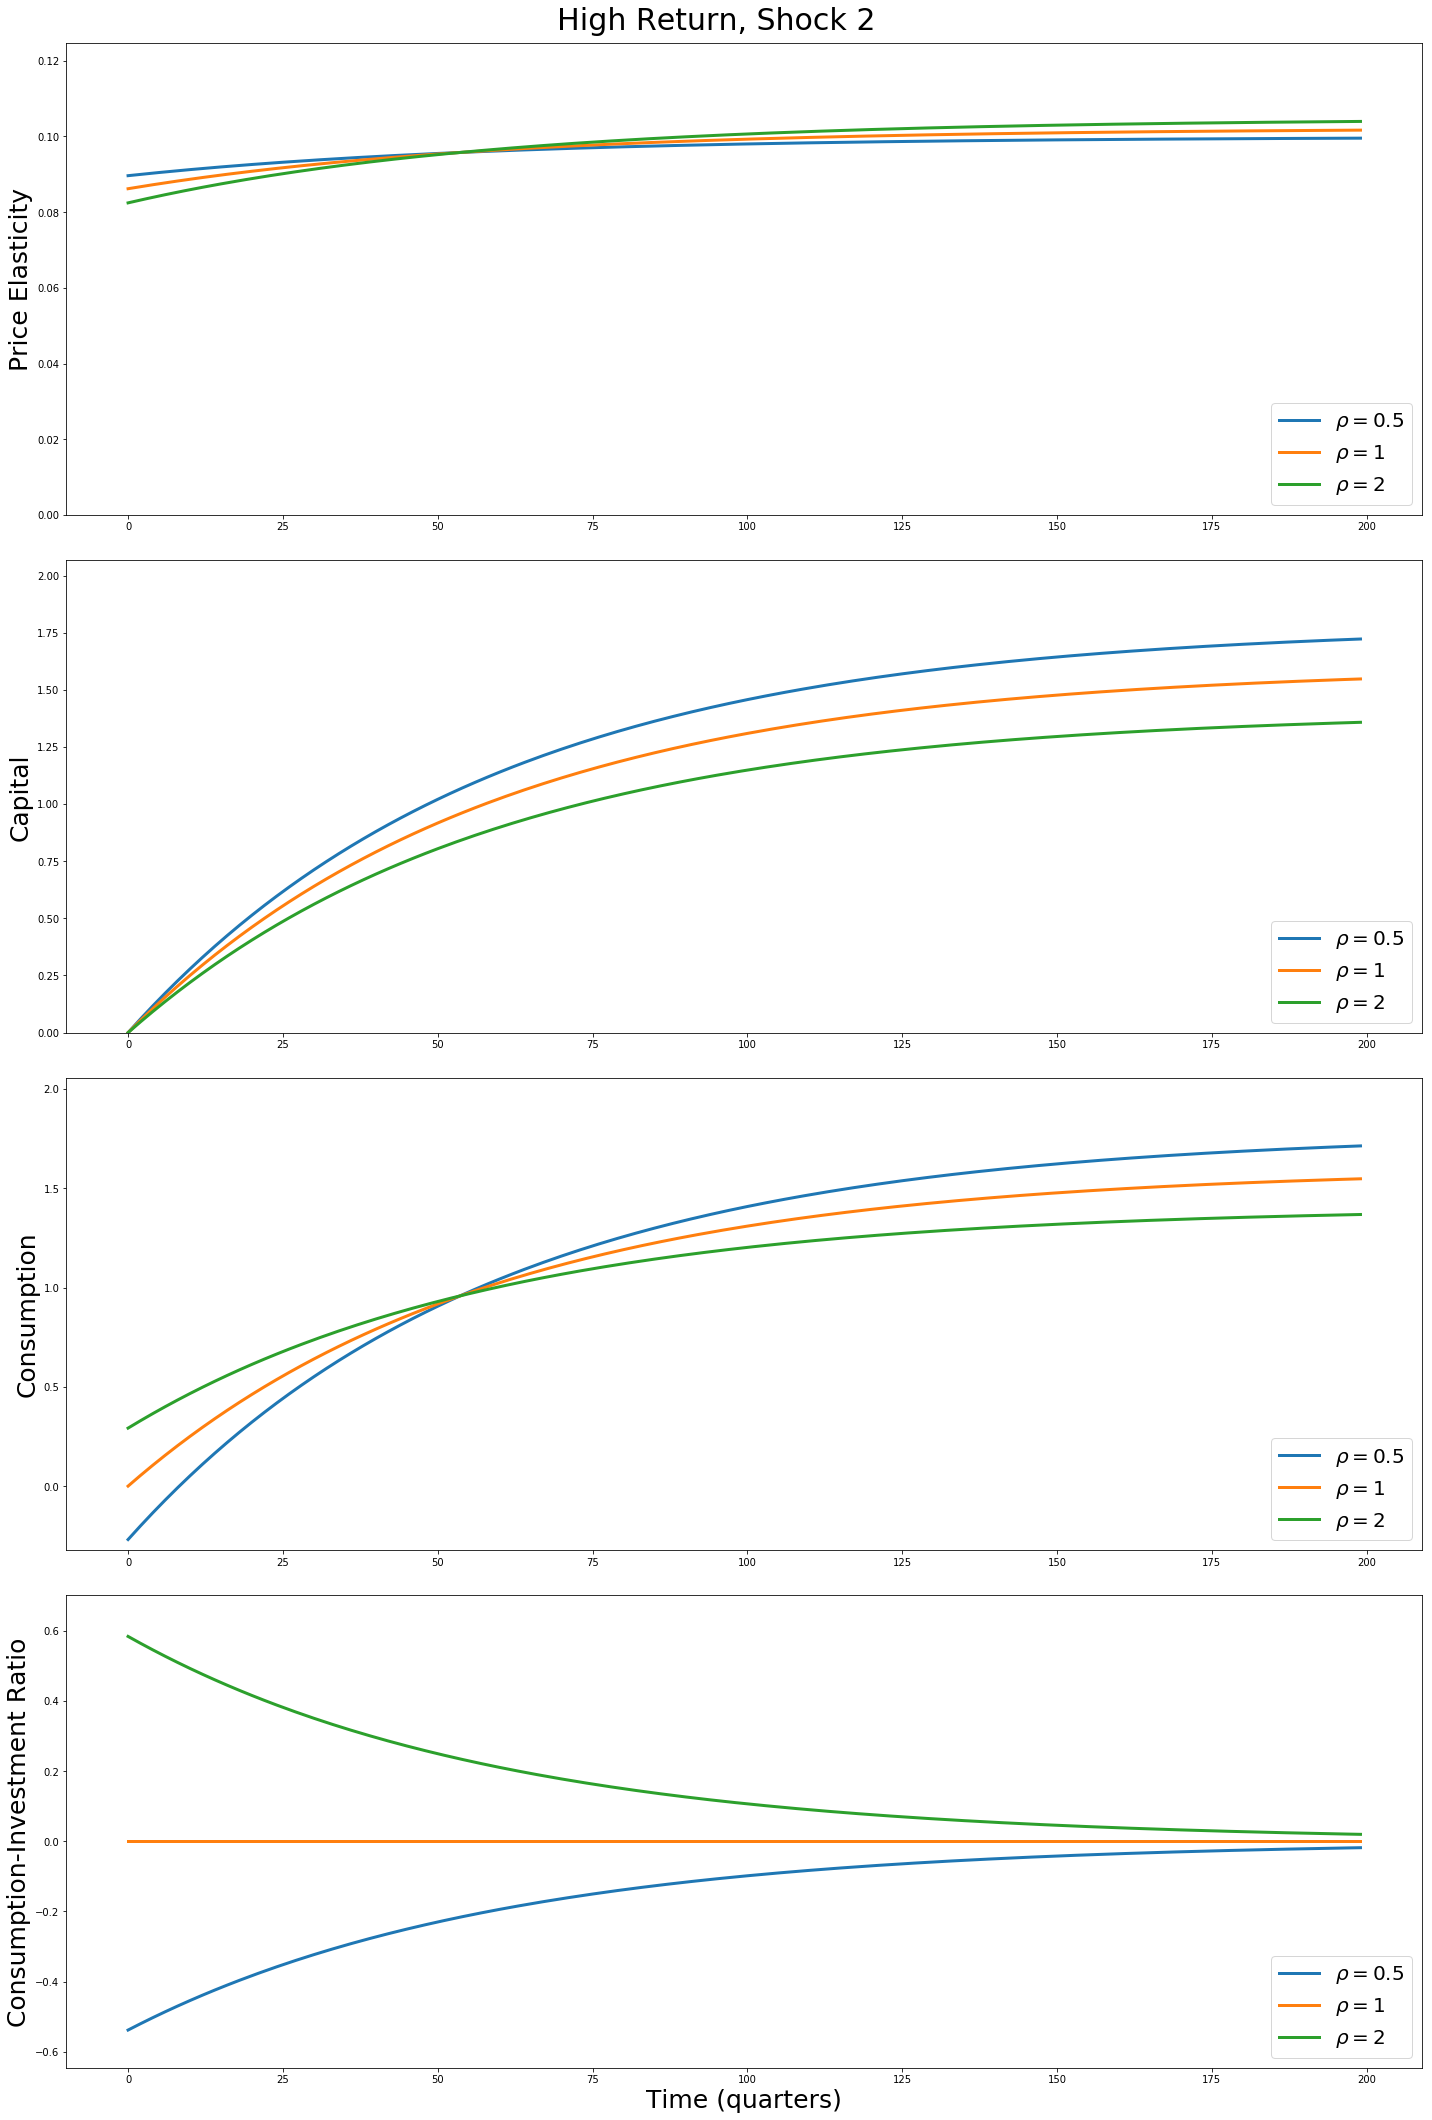

In [7]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 2, rf_factor = 2, 
             transform_shocks = False, title = "High Return, Shock 2")

### Section 1.4: Third Calibration, Zero Adjustment Cost

For comparison, we consider a corresponding model without adjustment costs.  Thus we set $\phi = 0$, and we no longer restrict the consumption/investment ratio to be one.  The implied value of ${\mathbb A} = .038$, the implied value of $\alpha_k = 2.24$ and order zero consumption captial ratio is $.44$.  For the return restriction, we impose: 
\begin{equation*}
\delta + .00373 \rho  = .015
\end{equation*}
implying a six percent annualized return.

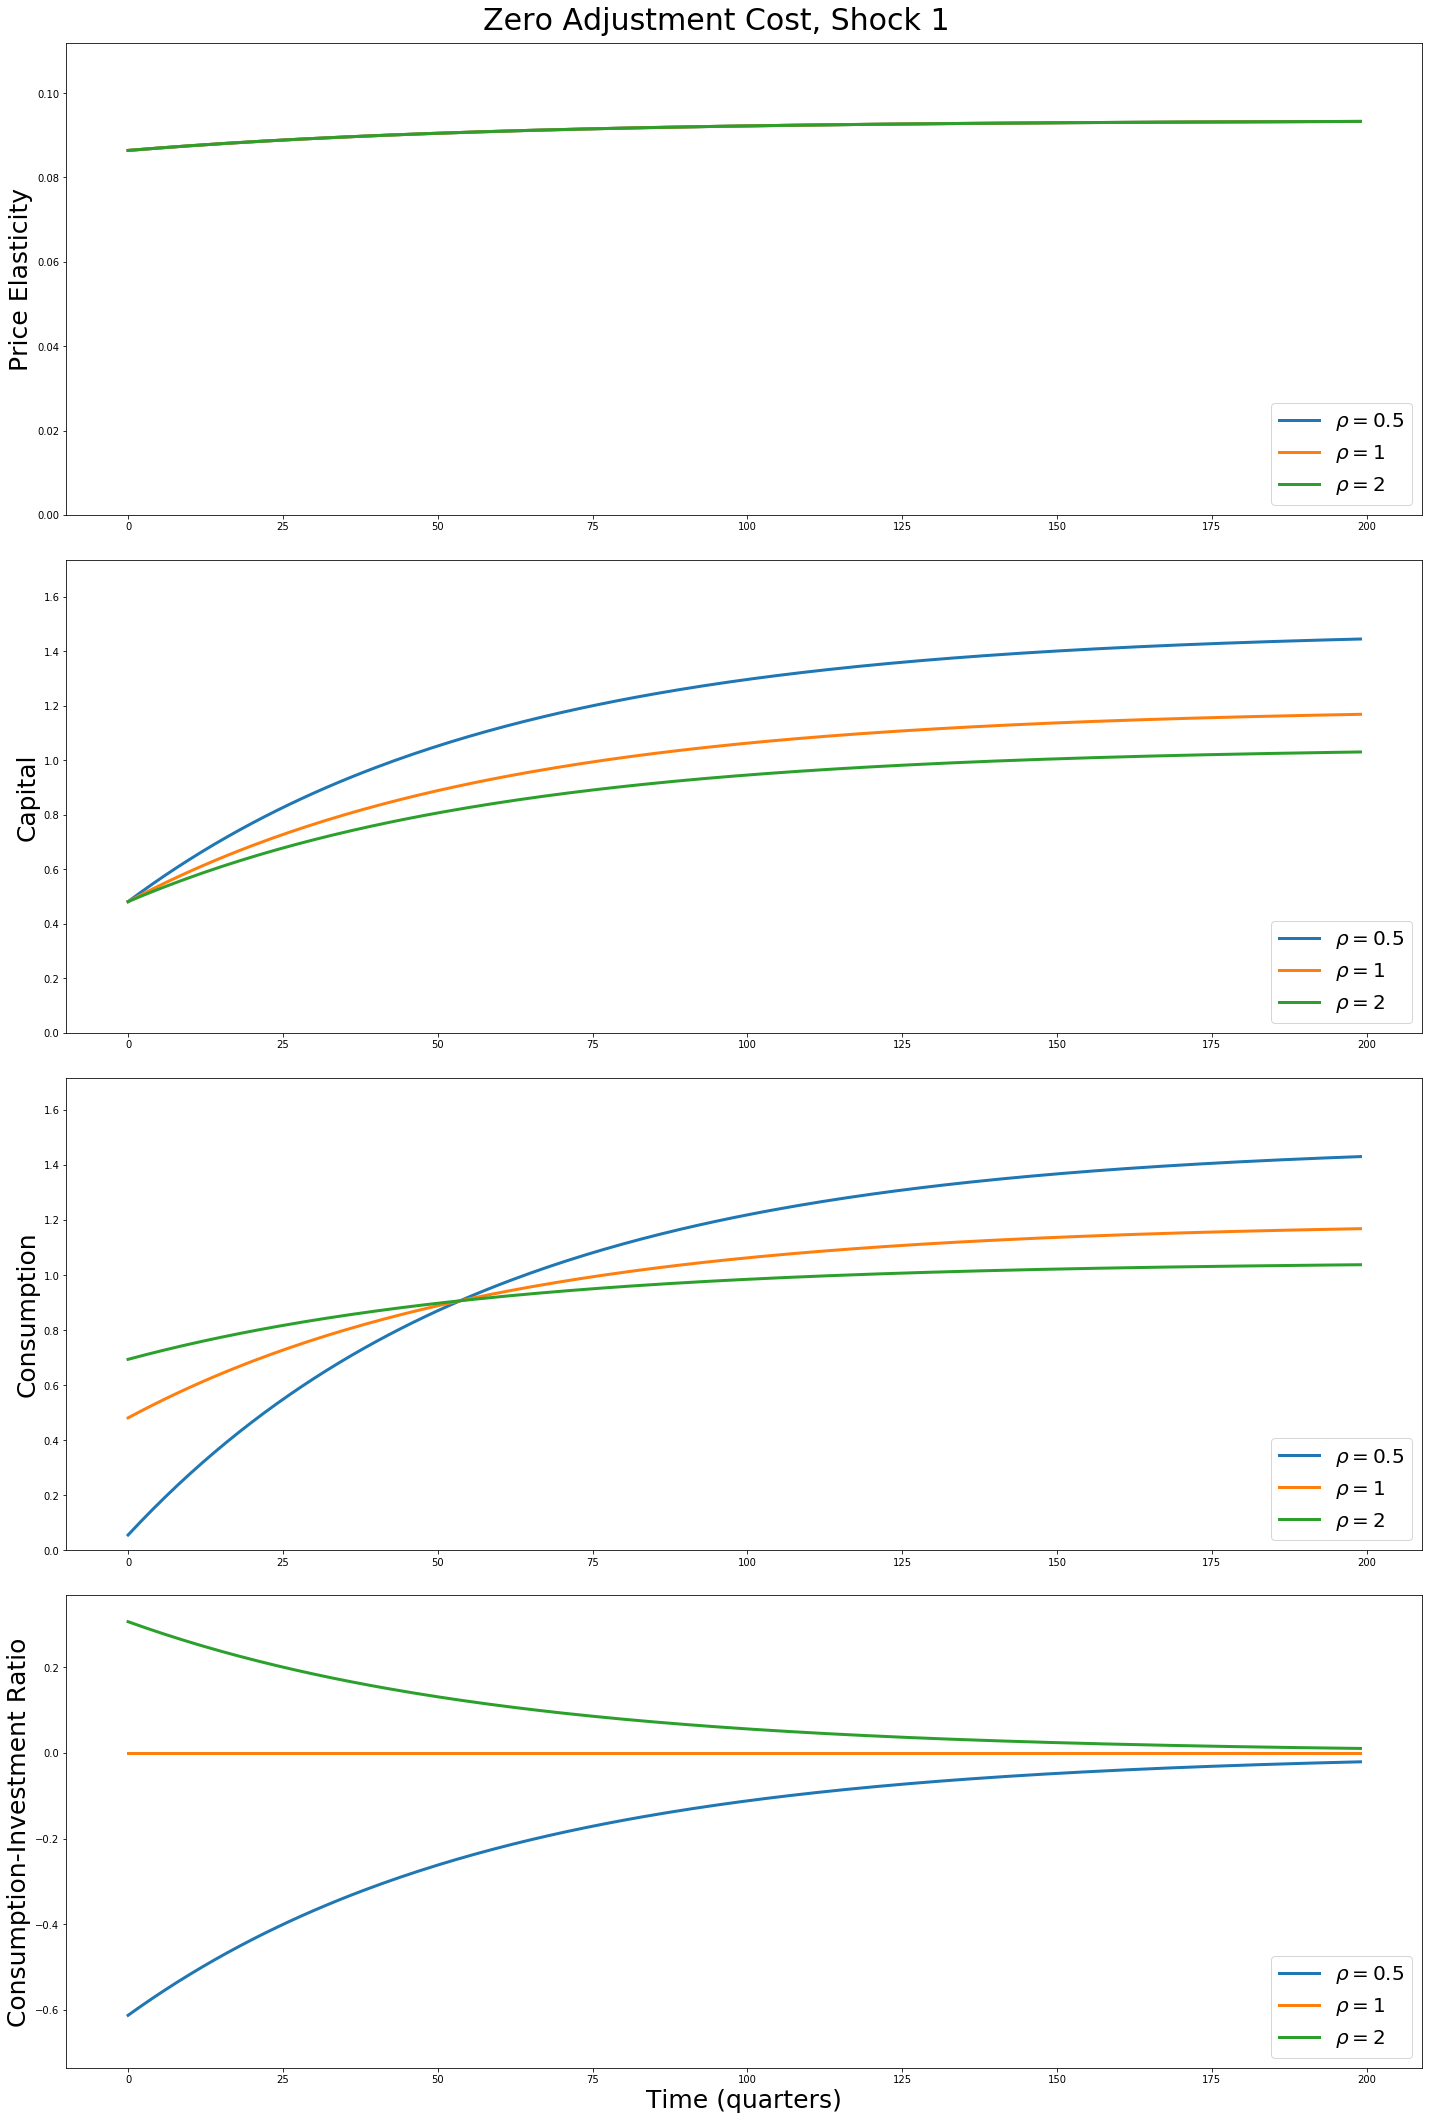

In [8]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 2, shock = 1, rf_factor = 2, 
             transform_shocks = False, title = "Zero Adjustment Cost, Shock 1")

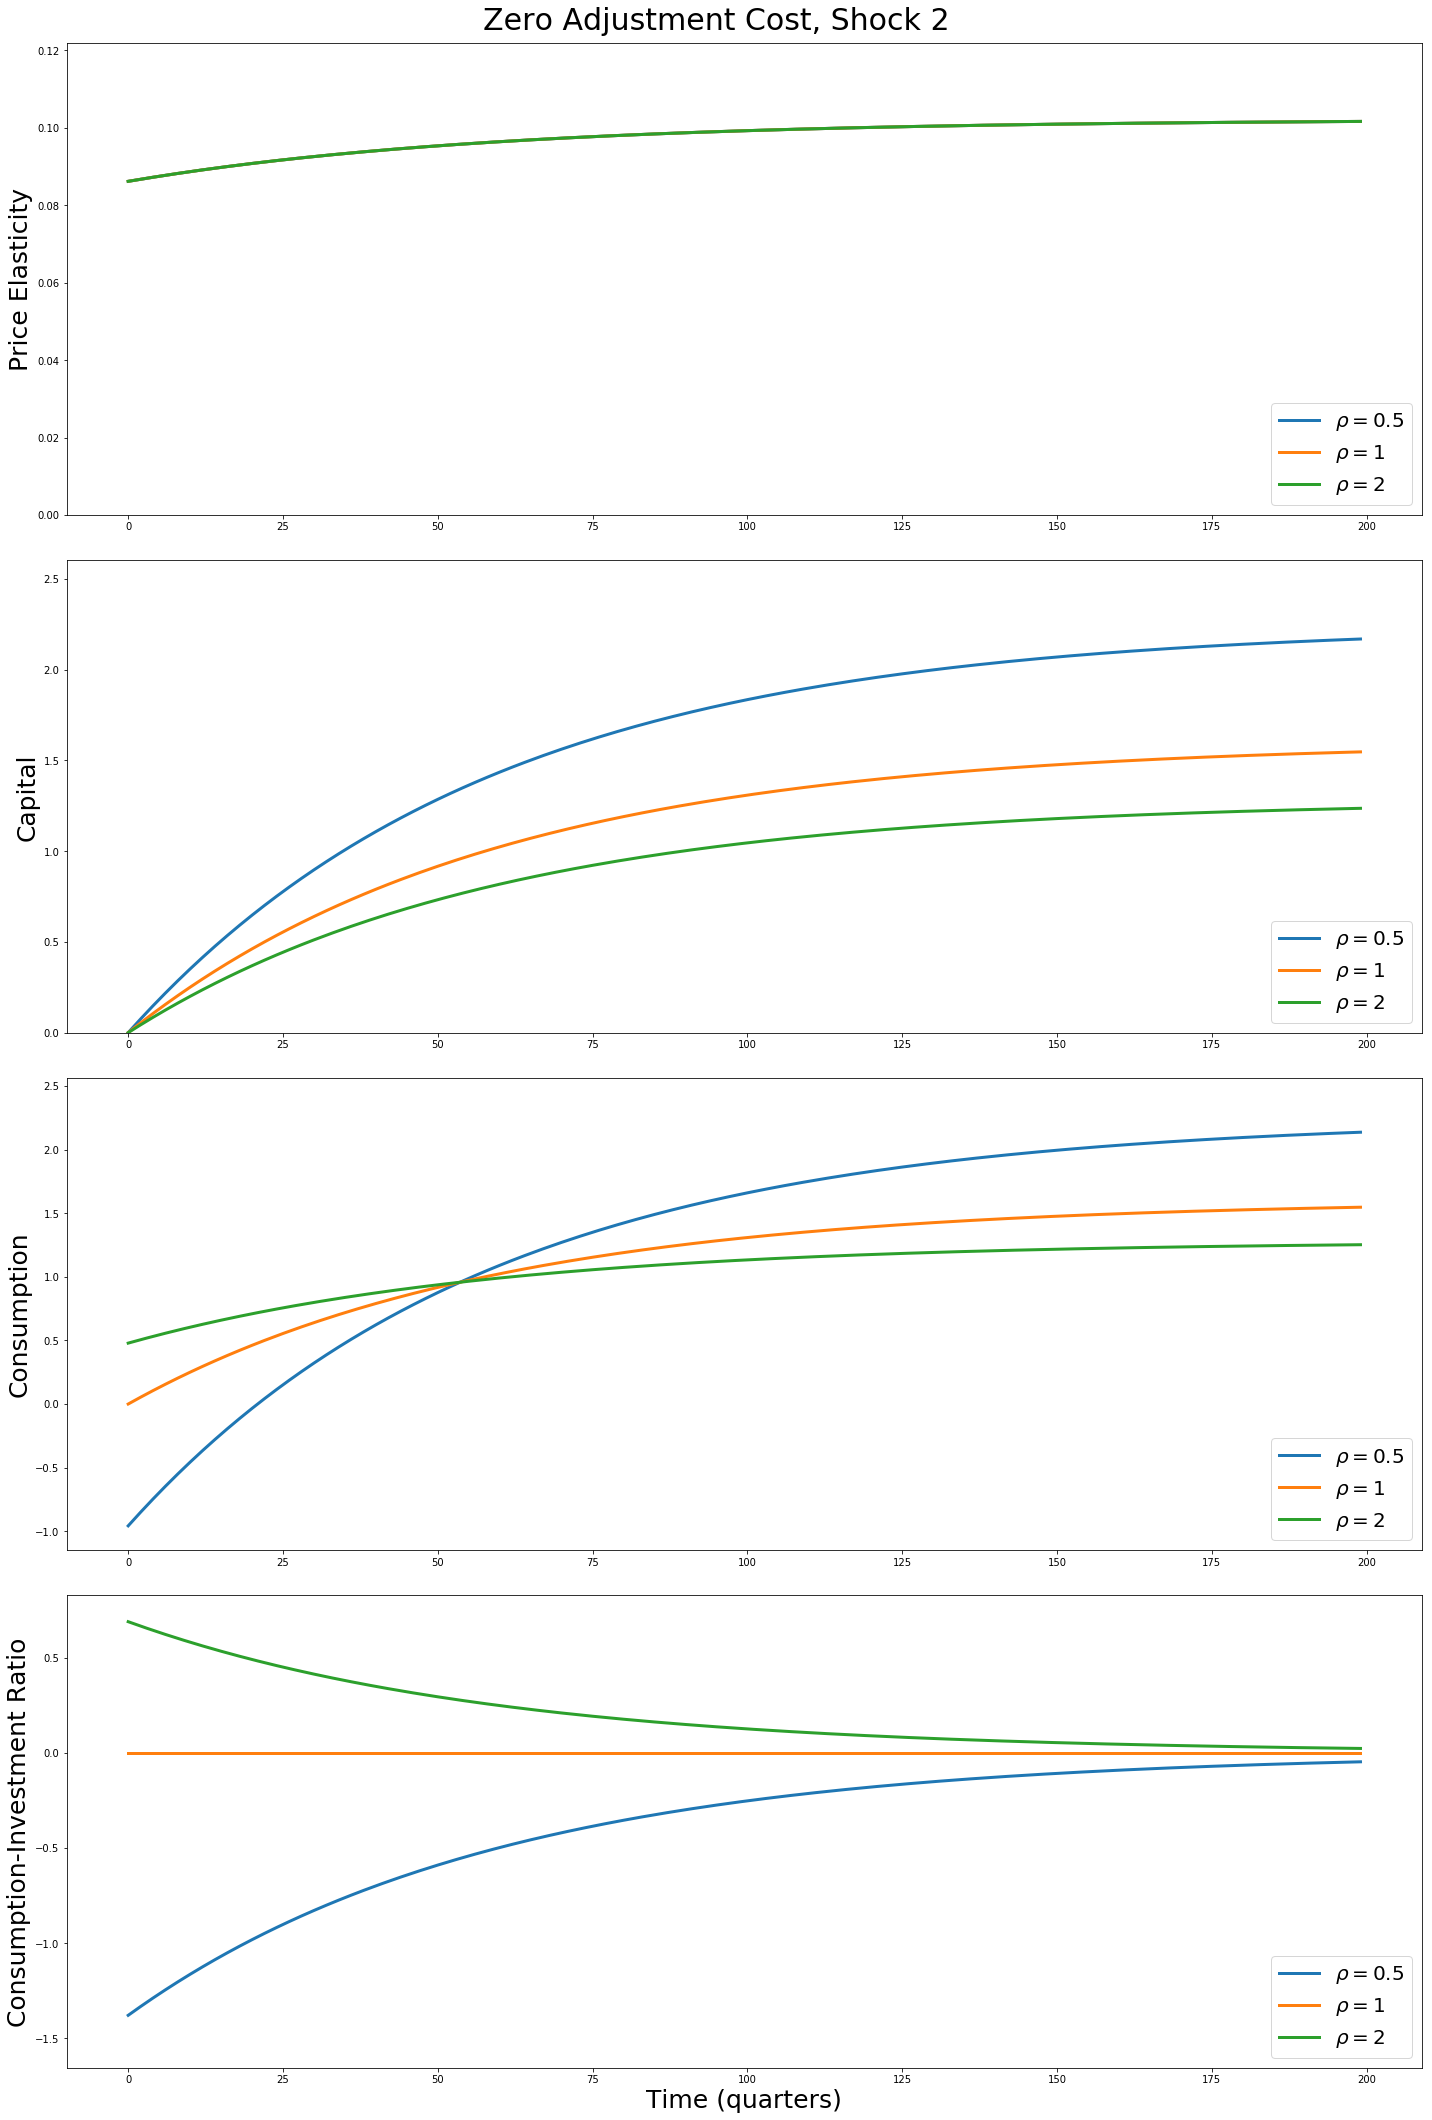

In [9]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 2, shock = 2, rf_factor = 2, 
             transform_shocks = False, title = "Zero Adjustment Cost, Shock 2")

### Section 1.5: Permanent and Transitory Shocks

In the previous calculations, both shocks have permanent consequences.  We now repeat these same exercises with an observationally equivalent shock configuration for which the first shock is permanent and the second one is transitory under the $\rho = 1$ specification.  Recall that for $\rho=1$ the consumption-captial and investment capital ratios are constant.  To implement this, we alter $\sigma$ as following:


\begin{equation*}  
\sigma =\begin{bmatrix}
(\sigma_k)' \cr (\sigma_z)' \end{bmatrix}  =    \begin{bmatrix} .287  & .386 \cr  .029 & - .0065 \end{bmatrix}
\end{equation*}



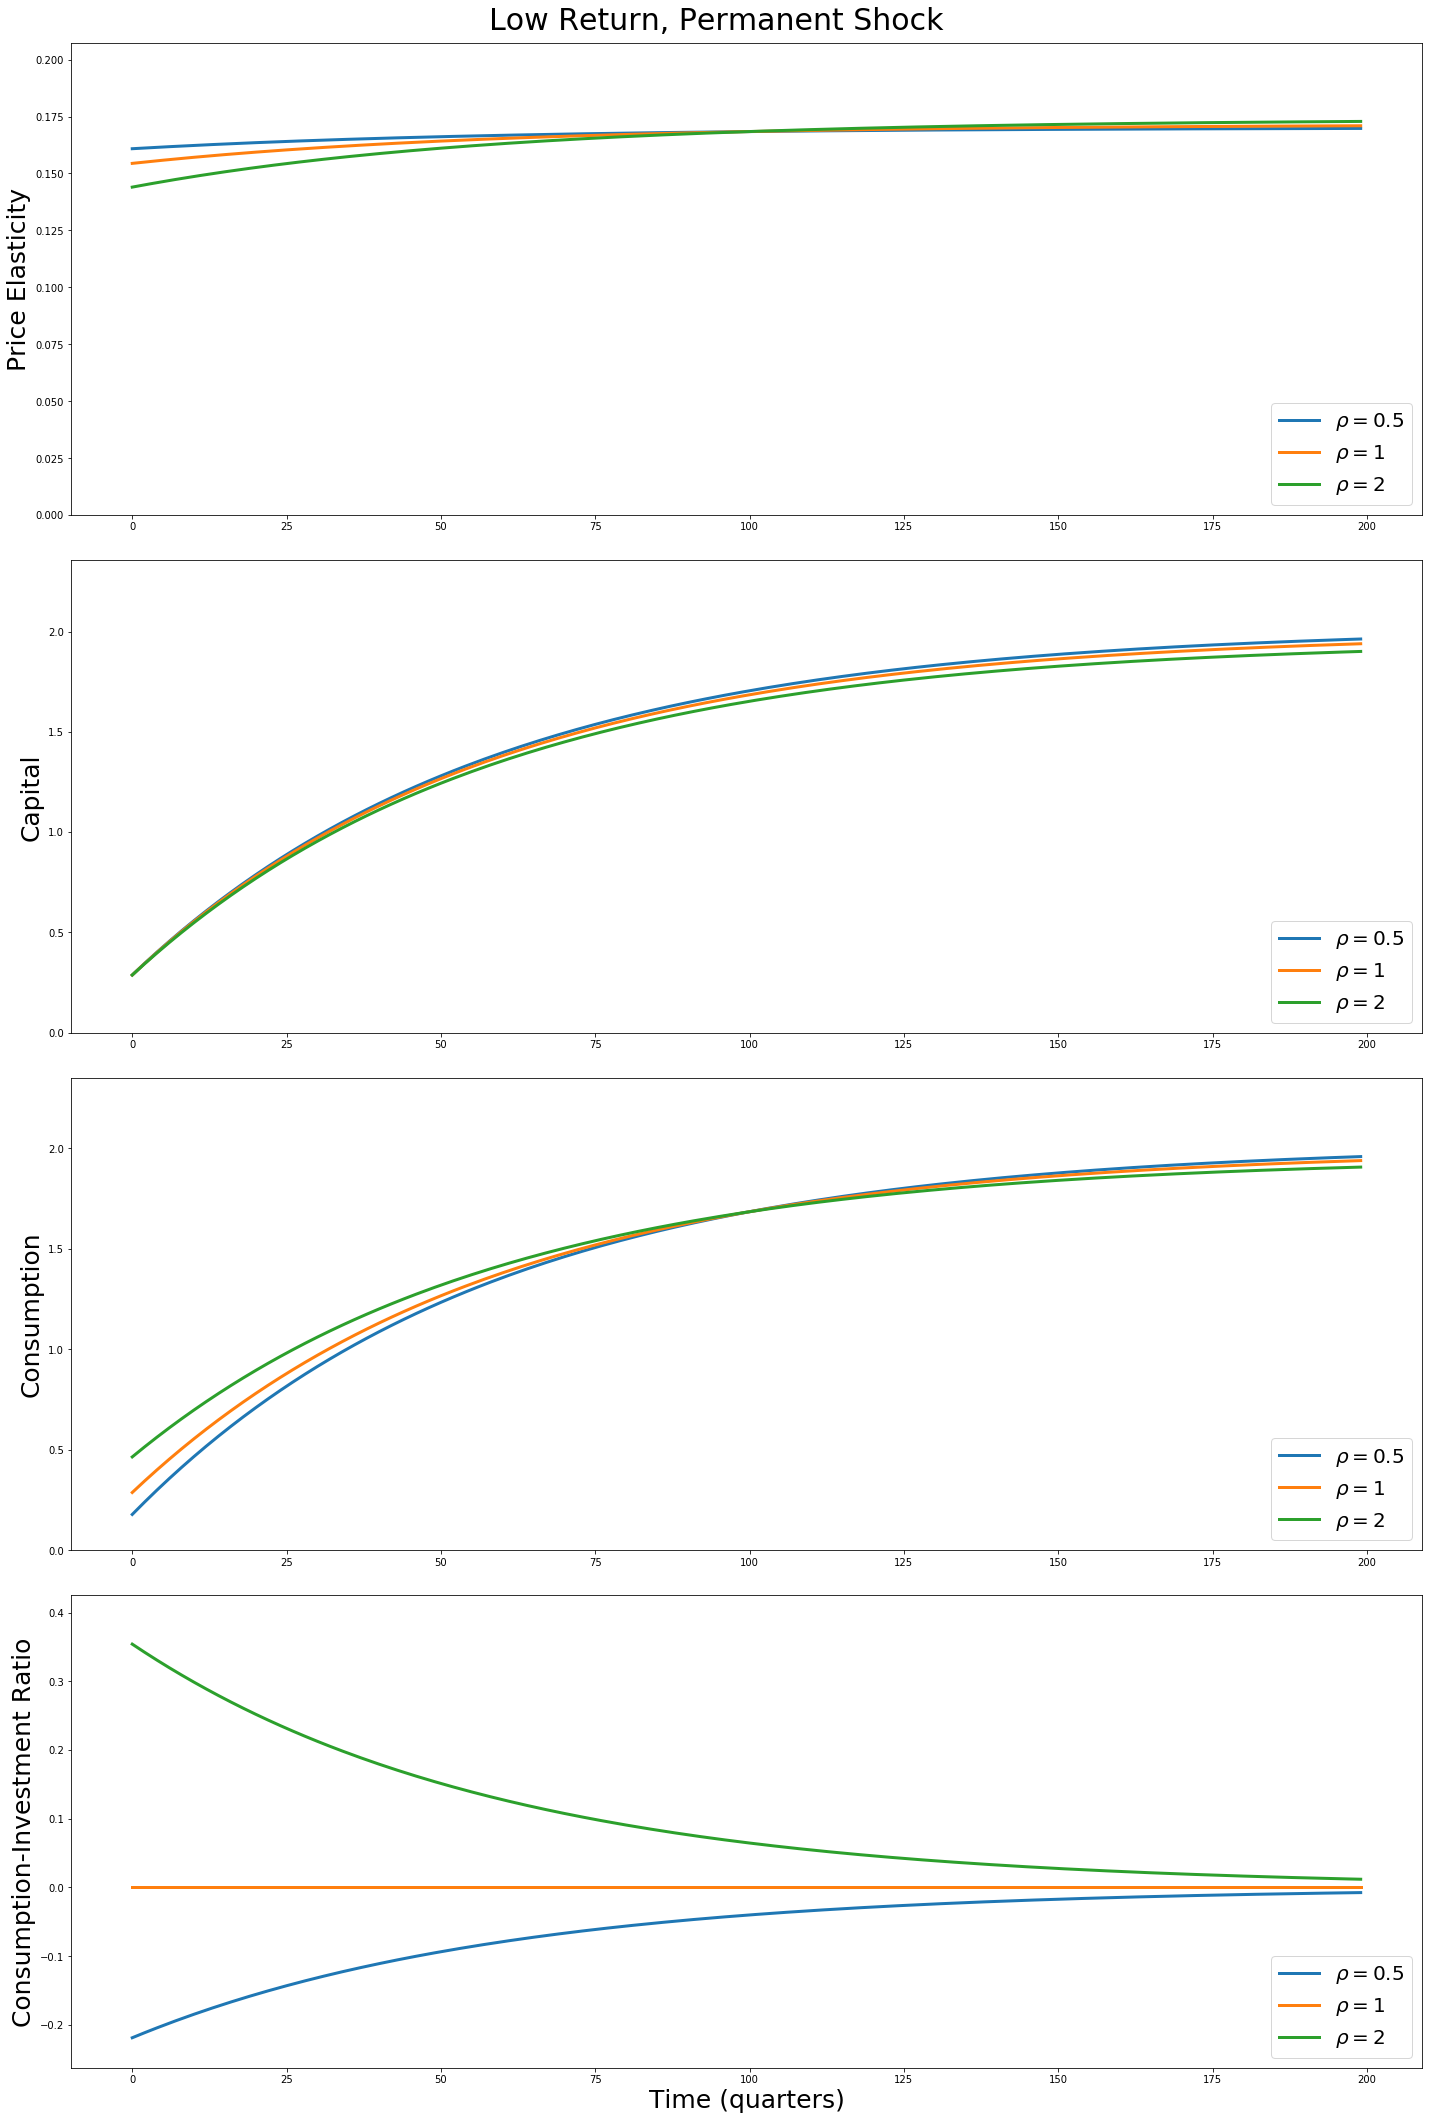

In [10]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 1, rf_factor = 1, 
             transform_shocks = True, title = "Low Return, Permanent Shock")

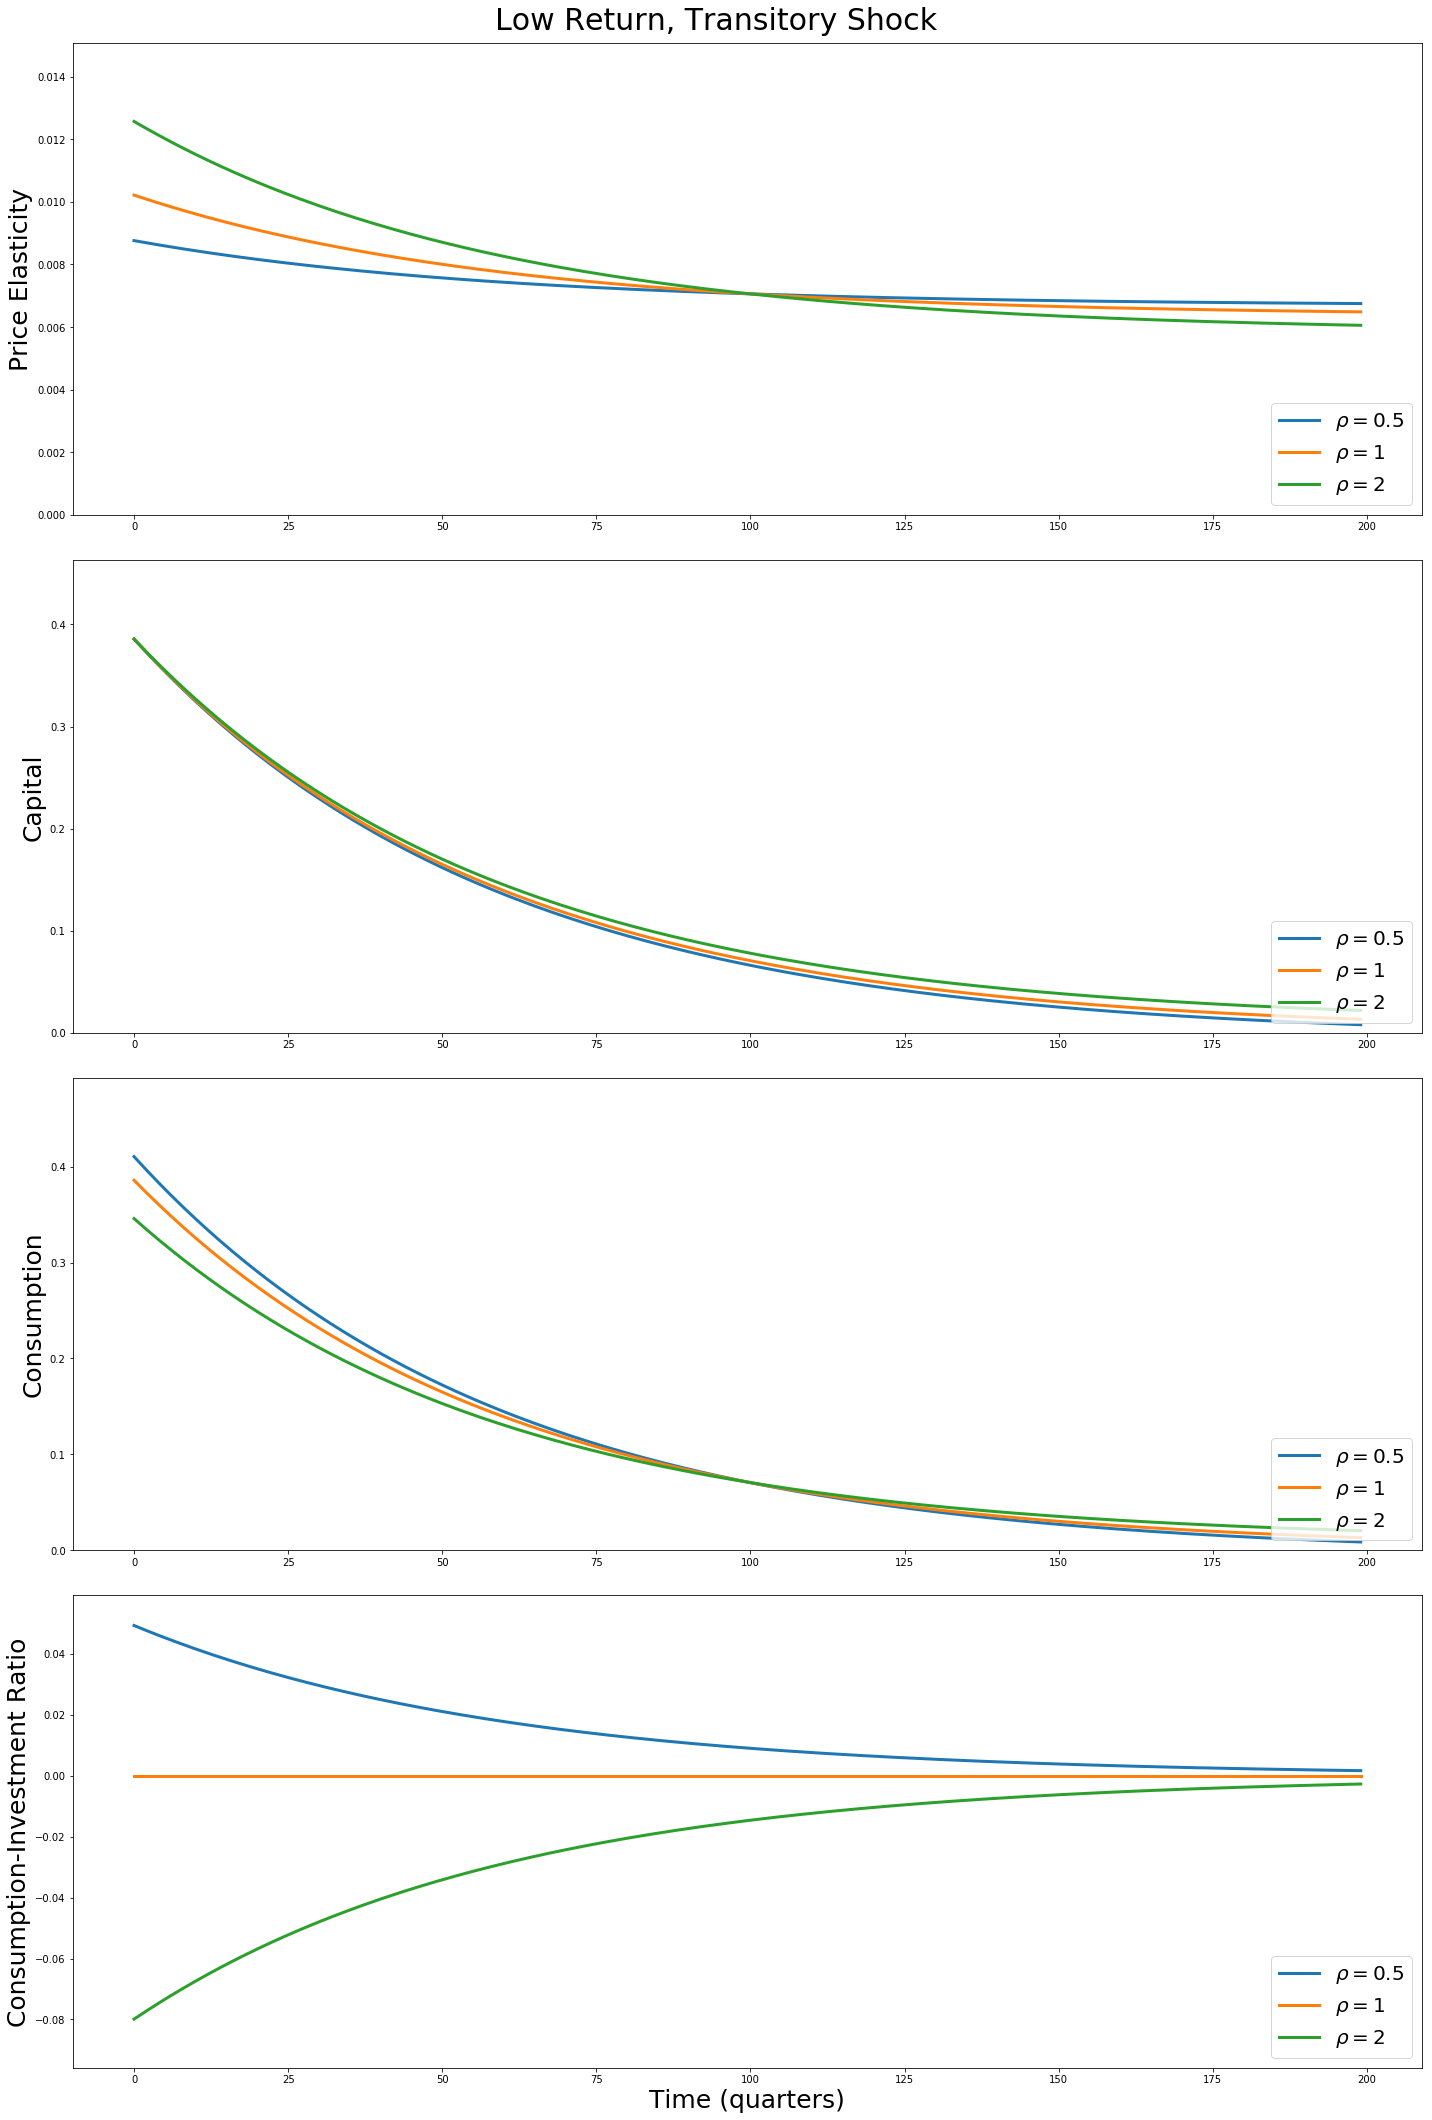

In [11]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 2, rf_factor = 1, 
             transform_shocks = True, title = "Low Return, Transitory Shock")

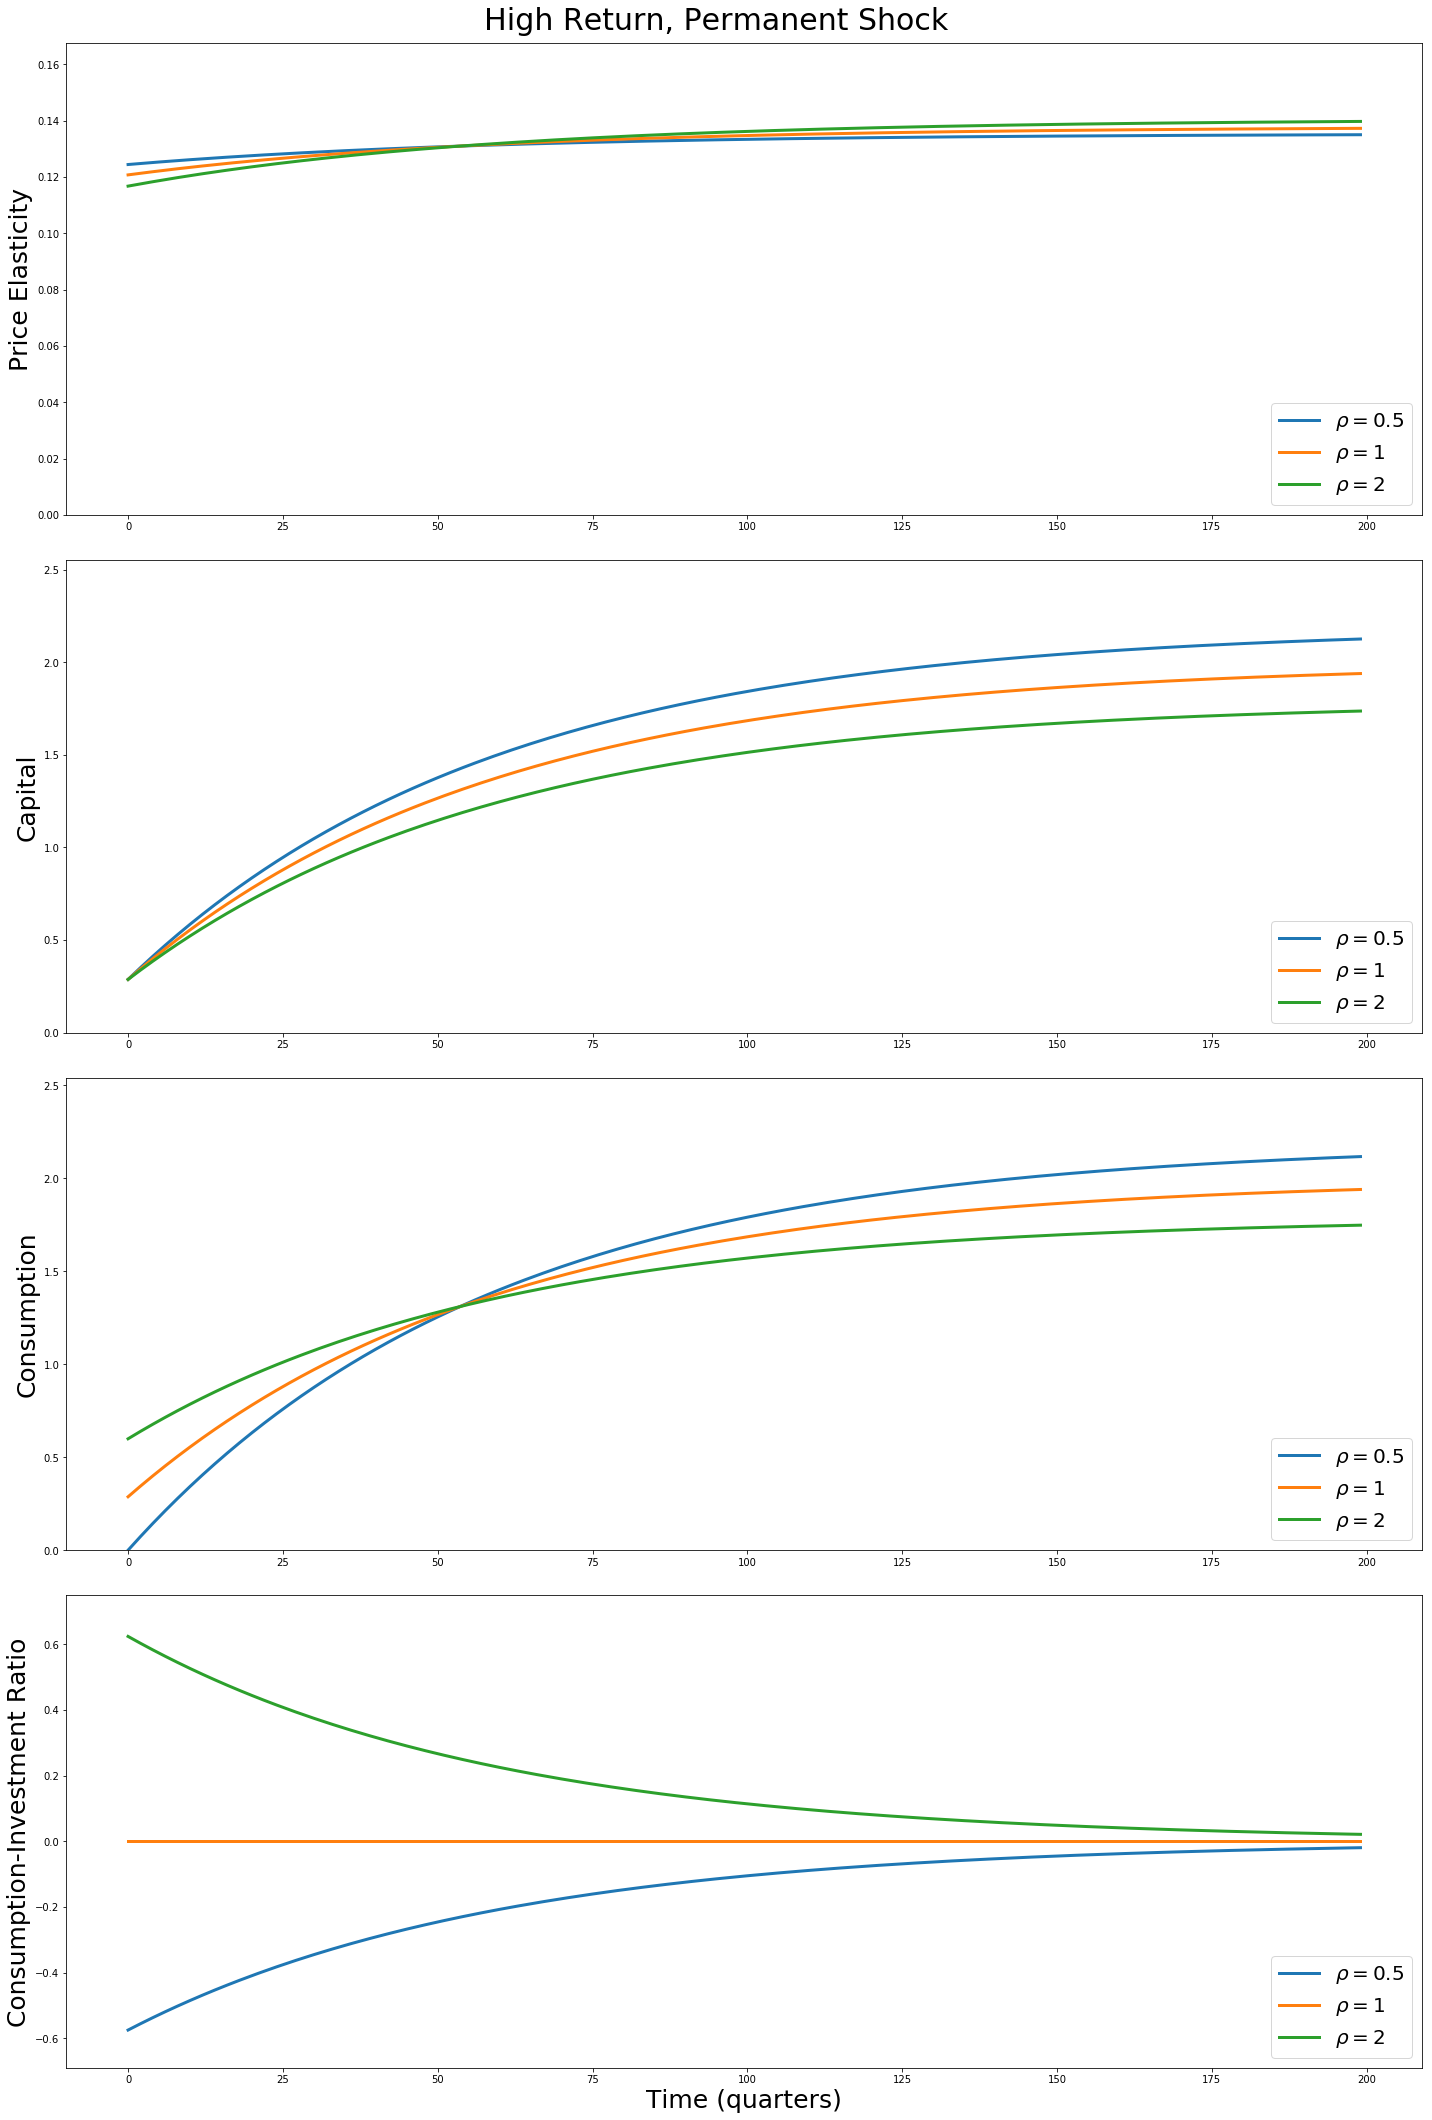

In [12]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 1, rf_factor = 2, 
             transform_shocks = True, title = "High Return, Permanent Shock")

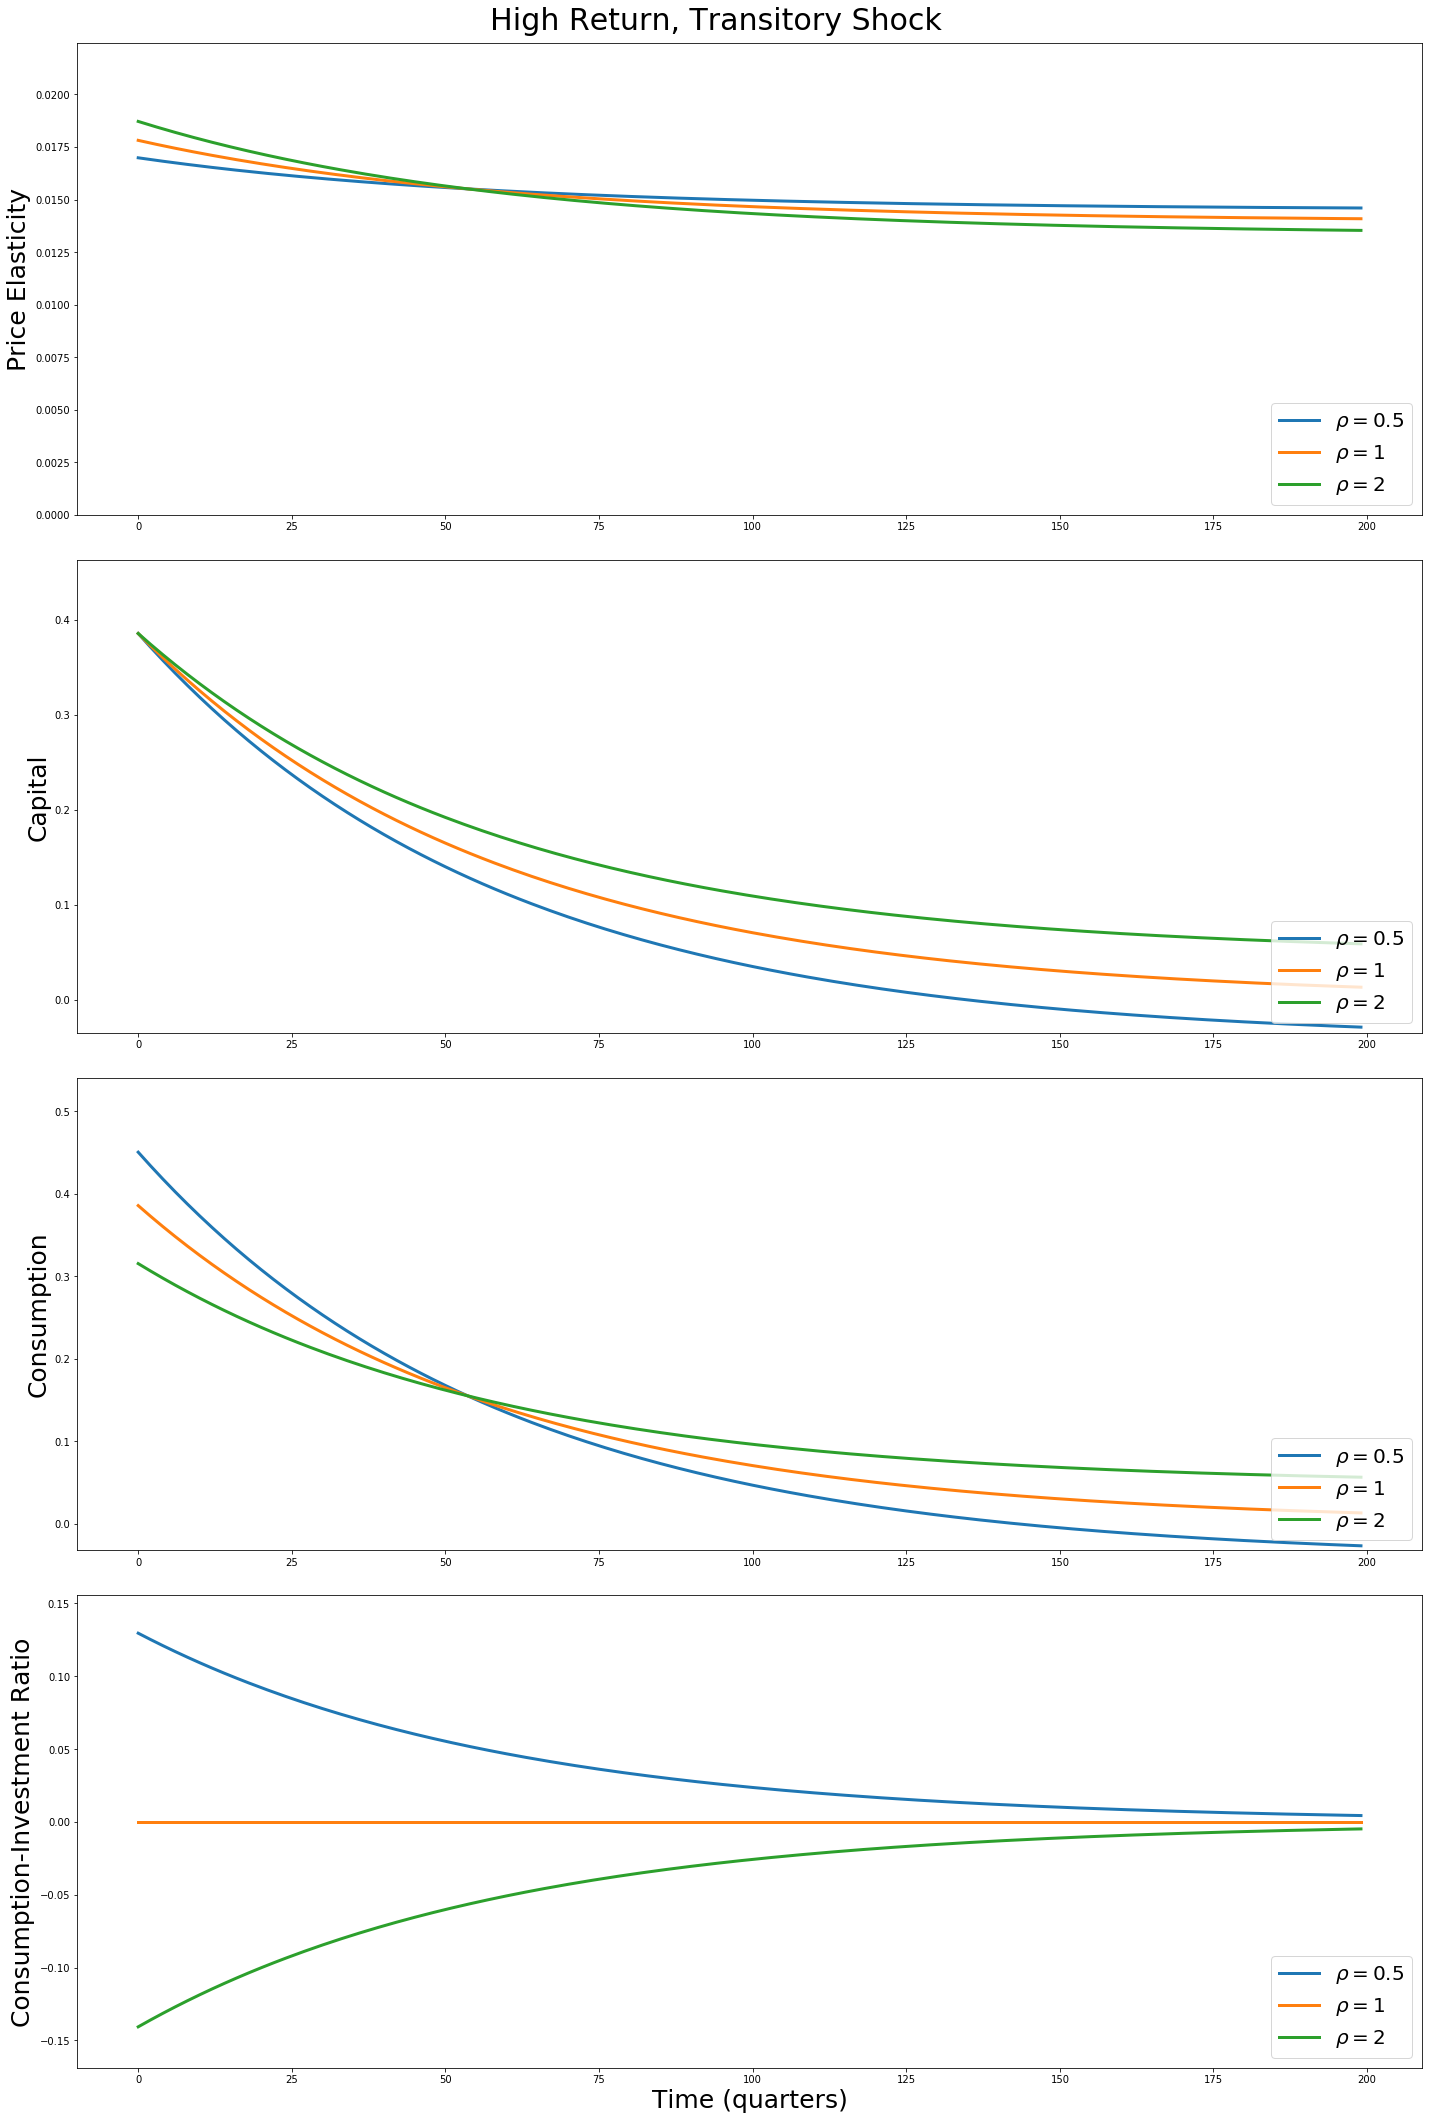

In [13]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 1, shock = 2, rf_factor = 2, 
             transform_shocks = True, title = "High Return, Transitory Shock")

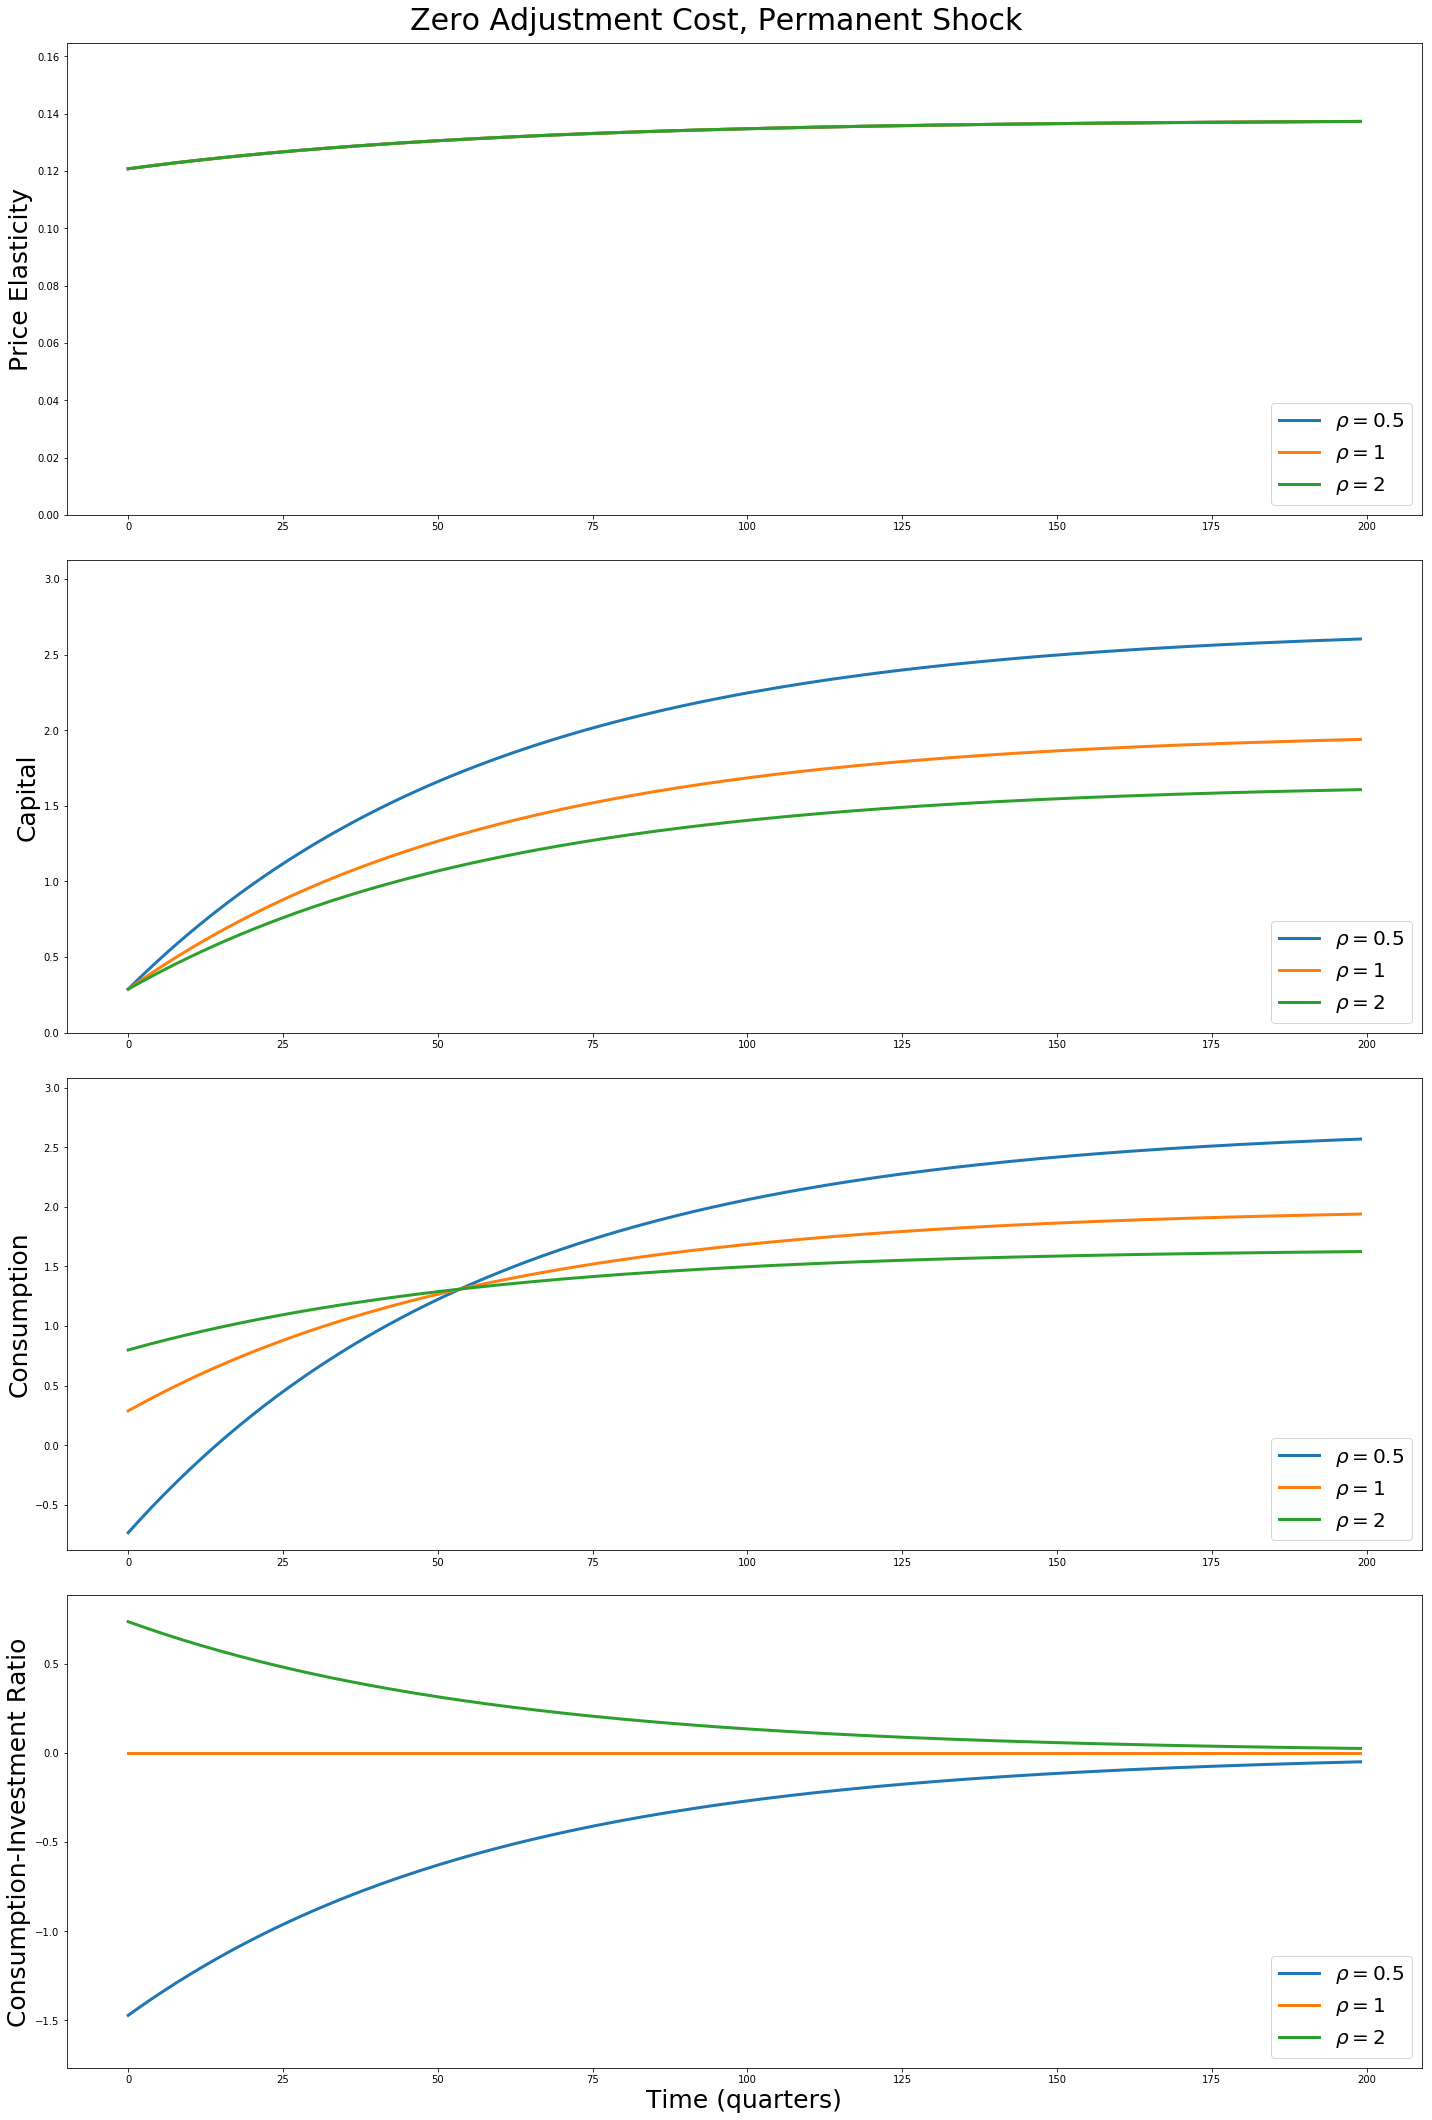

In [14]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 2, shock = 1, rf_factor = 2, 
             transform_shocks = True, title = "Zero Adjustment Cost, Permanent Shock")

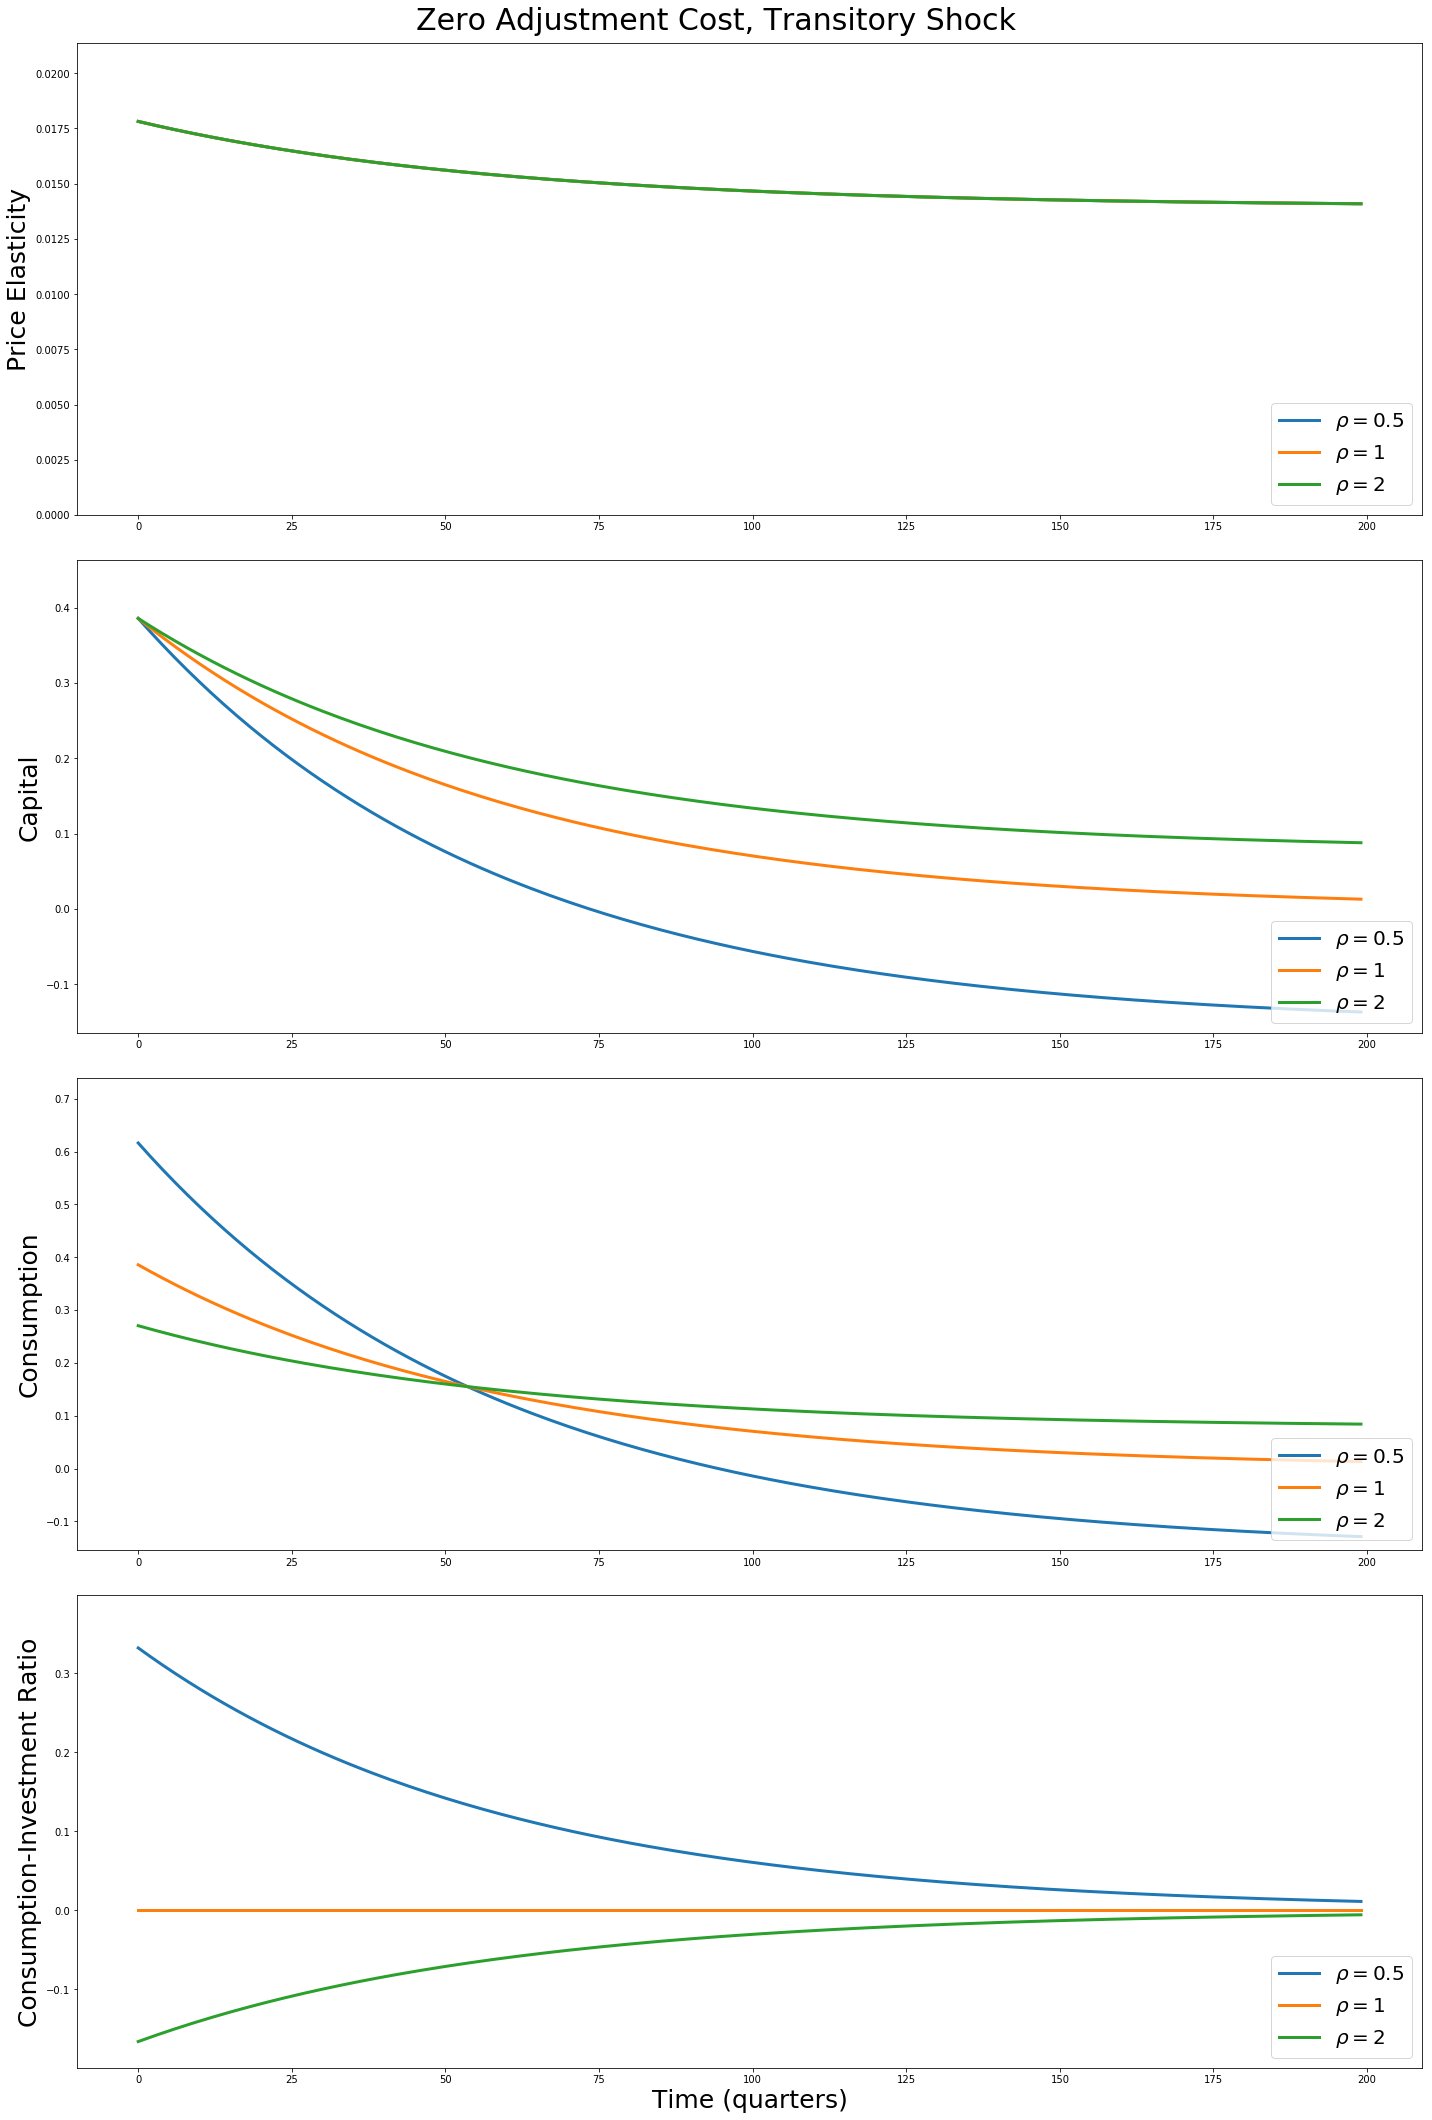

In [15]:
plot_impulse(ρs, γ, δ, ϕ, A, α, ζ, T, empirical_method = 2, shock = 2, rf_factor = 2, 
             transform_shocks = True, title = "Zero Adjustment Cost, Transitory Shock")

## References

Eberly, Janice, and Neng Wang. 2009. "Capital Reallocation and Growth." American Economic Review, 99 (2): 560-66.